In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


df = pd.concat([train, test], axis=0)

In [3]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [6]:
def check_df(dataframe, head = 5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.head(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    
    numeric_columns = dataframe.select_dtypes(include=[np.number])
    print("##################### Quantiles #####################")
    print(numeric_columns.quantile([0, 0.05, 0.95, 0.99, 1]).T)

In [7]:
check_df(df)

##################### Shape #####################
(2919, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2  

In [8]:
def grab_col_names(dataframe, categorical_threshold = 10, cardinal_threshold = 22):
    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    numeric_looking_but_categorical = [col for col in dataframe.columns if dataframe[col].dtype != "O" and dataframe[col].nunique() < categorical_threshold]
    
    categorical_looking_but_cardinal = [col for col in dataframe.columns  if dataframe[col].dtype == "O" and dataframe[col].nunique() > cardinal_threshold]
    
    categorical_cols = categorical_cols + numeric_looking_but_categorical
    
    categorical_cols = [col for col in categorical_cols if col not in categorical_looking_but_cardinal]
    
    numeric_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    
    numeric_cols = [col for col in numeric_cols if col not in numeric_looking_but_categorical]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns: {len(categorical_cols)}")
    print(f"Numeric Columns: {len(numeric_cols)}")
    print(f"Categorical Looking but Cardinal: {len(categorical_looking_but_cardinal)}")
    print(f"Numeric Looking but Categorical: {len(numeric_looking_but_categorical)}")
    return categorical_cols, numeric_cols, categorical_looking_but_cardinal

In [9]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 81
Categorical Columns: 52
Numeric Columns: 28
Categorical Looking but Cardinal: 1
Numeric Looking but Categorical: 10


## Observe the distribution of numerical and categorical variables in the data.

In [10]:
def categorical_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                       "Ratio" : dataframe[col_name].value_counts()/ len(dataframe)}))
    
    if plot: 
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block=True)

         MSZoning  Ratio
RL           2265  0.776
RM            460  0.158
FV            139  0.048
RH             26  0.009
C (all)        25  0.009


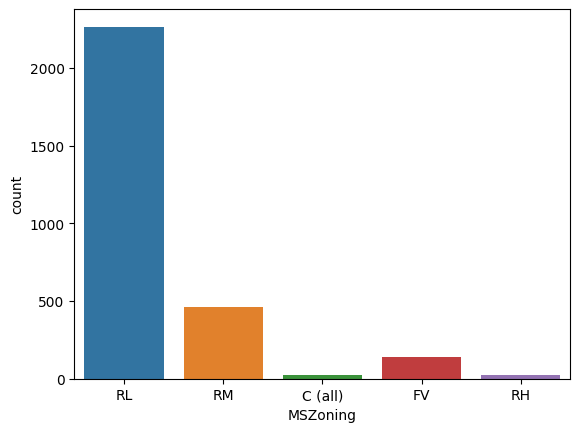

      Street  Ratio
Pave    2907  0.996
Grvl      12  0.004


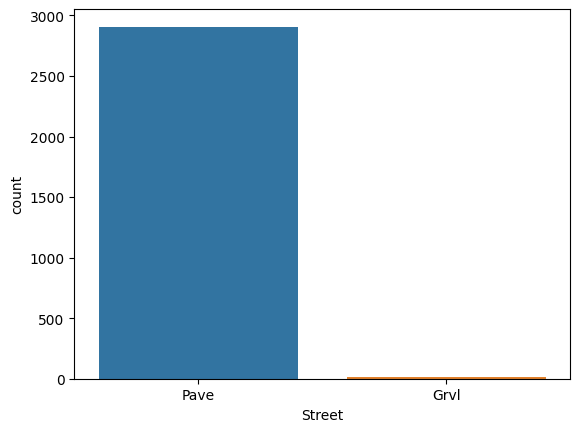

      Alley  Ratio
Grvl    120  0.041
Pave     78  0.027


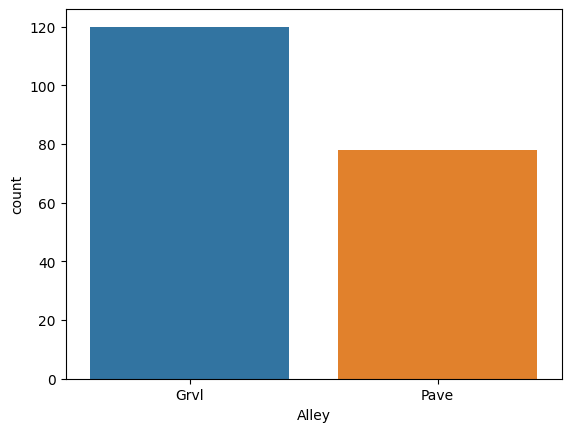

     LotShape  Ratio
Reg      1859  0.637
IR1       968  0.332
IR2        76  0.026
IR3        16  0.005


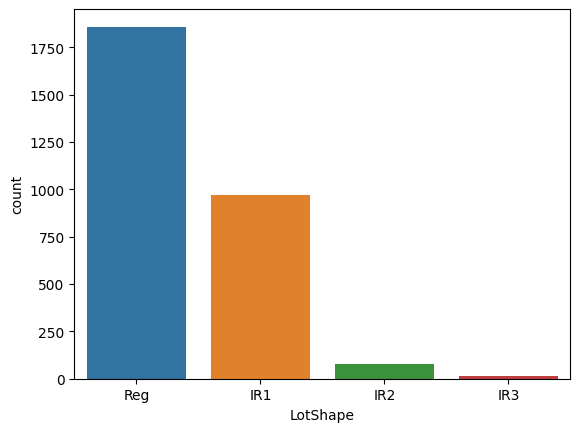

     LandContour  Ratio
Lvl         2622  0.898
HLS          120  0.041
Bnk          117  0.040
Low           60  0.021


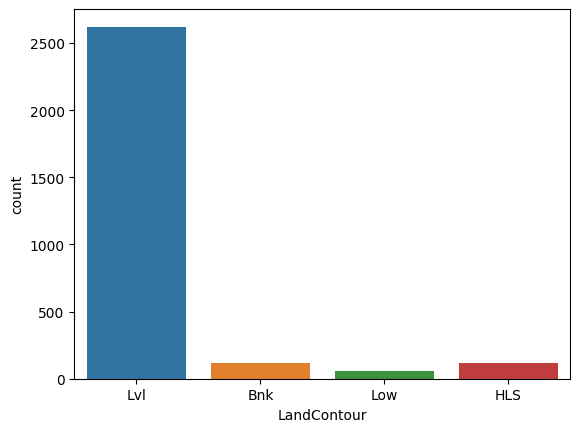

        Utilities  Ratio
AllPub       2916  0.999
NoSeWa          1  0.000


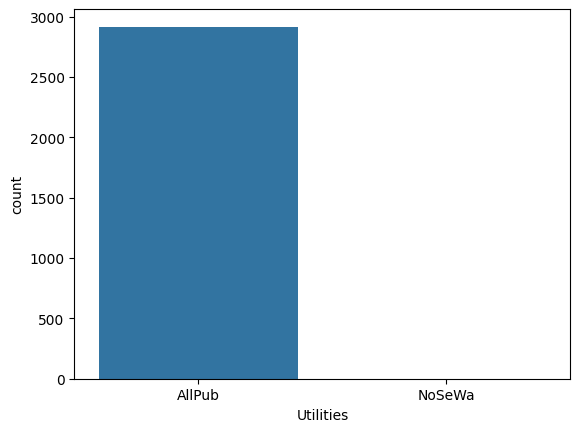

         LotConfig  Ratio
Inside        2133  0.731
Corner         511  0.175
CulDSac        176  0.060
FR2             85  0.029
FR3             14  0.005


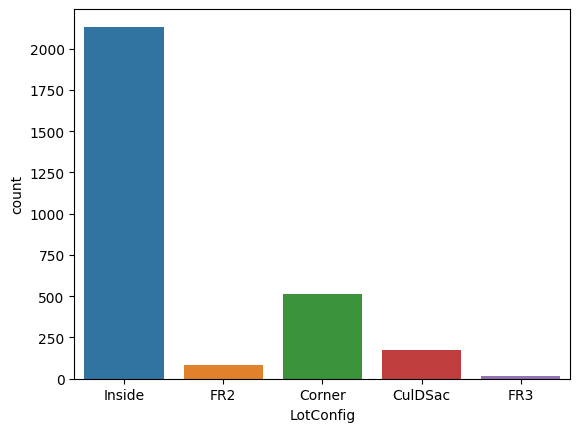

     LandSlope  Ratio
Gtl       2778  0.952
Mod        125  0.043
Sev         16  0.005


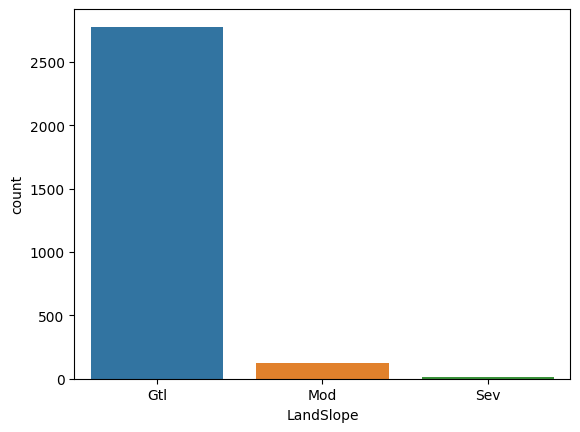

        Condition1  Ratio
Norm          2511  0.860
Feedr          164  0.056
Artery          92  0.032
RRAn            50  0.017
PosN            39  0.013
RRAe            28  0.010
PosA            20  0.007
RRNn             9  0.003
RRNe             6  0.002


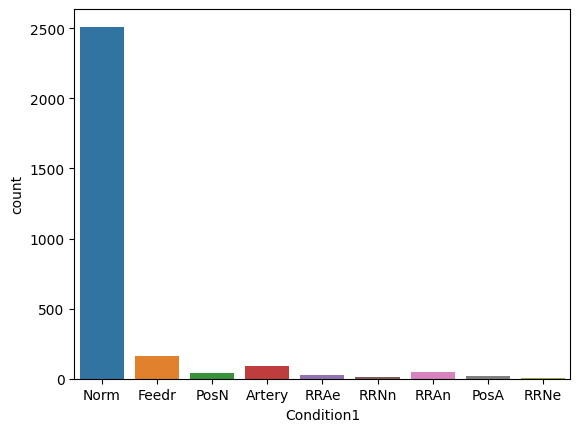

        Condition2  Ratio
Norm          2889  0.990
Feedr           13  0.004
Artery           5  0.002
PosN             4  0.001
PosA             4  0.001
RRNn             2  0.001
RRAn             1  0.000
RRAe             1  0.000


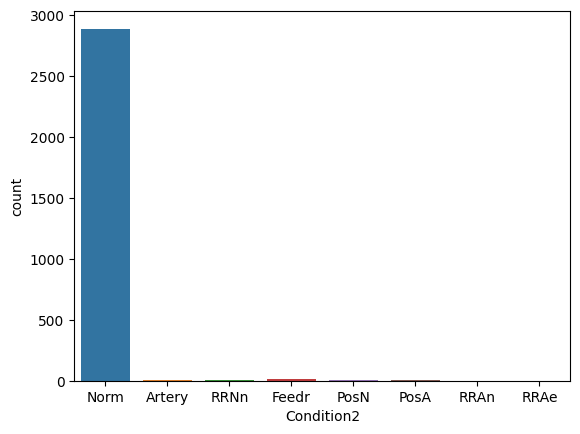

        BldgType  Ratio
1Fam        2425  0.831
TwnhsE       227  0.078
Duplex       109  0.037
Twnhs         96  0.033
2fmCon        62  0.021


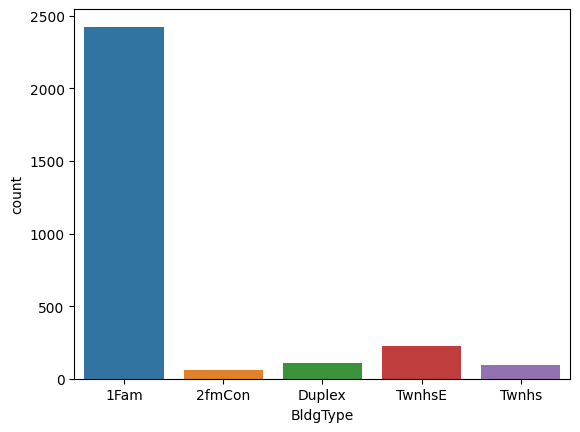

        HouseStyle  Ratio
1Story        1471  0.504
2Story         872  0.299
1.5Fin         314  0.108
SLvl           128  0.044
SFoyer          83  0.028
2.5Unf          24  0.008
1.5Unf          19  0.007
2.5Fin           8  0.003


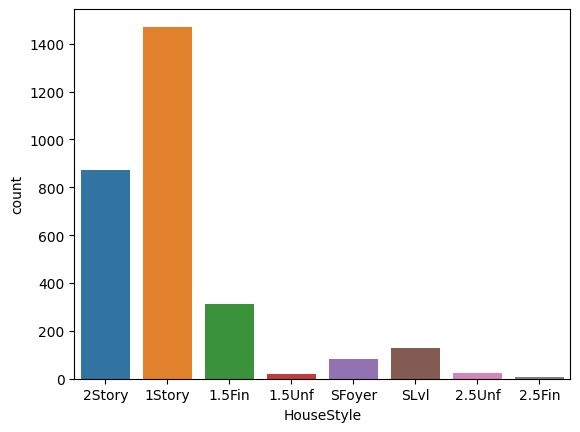

         RoofStyle  Ratio
Gable         2310  0.791
Hip            551  0.189
Gambrel         22  0.008
Flat            20  0.007
Mansard         11  0.004
Shed             5  0.002


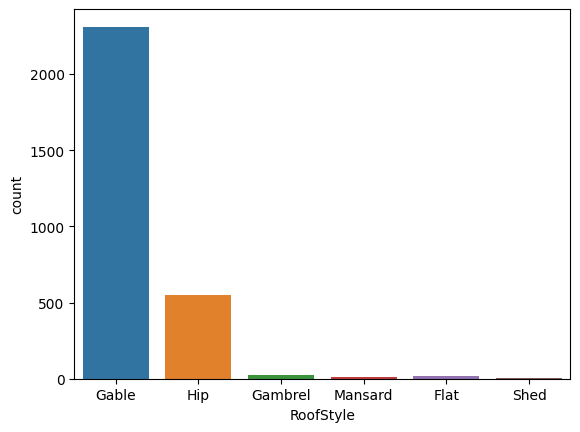

         RoofMatl  Ratio
CompShg      2876  0.985
Tar&Grv        23  0.008
WdShake         9  0.003
WdShngl         7  0.002
Metal           1  0.000
Membran         1  0.000
Roll            1  0.000
ClyTile         1  0.000


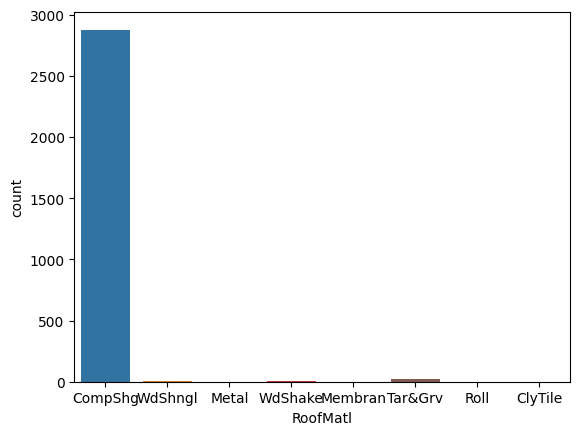

         Exterior1st  Ratio
VinylSd         1025  0.351
MetalSd          450  0.154
HdBoard          442  0.151
Wd Sdng          411  0.141
Plywood          221  0.076
CemntBd          126  0.043
BrkFace           87  0.030
WdShing           56  0.019
AsbShng           44  0.015
Stucco            43  0.015
BrkComm            6  0.002
AsphShn            2  0.001
Stone              2  0.001
CBlock             2  0.001
ImStucc            1  0.000


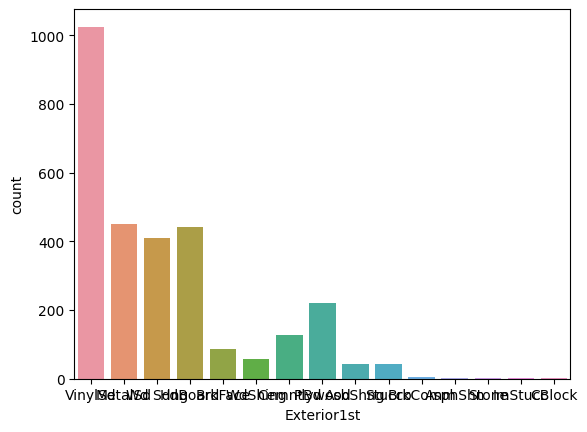

         Exterior2nd  Ratio
VinylSd         1014  0.347
MetalSd          447  0.153
HdBoard          406  0.139
Wd Sdng          391  0.134
Plywood          270  0.092
CmentBd          126  0.043
Wd Shng           81  0.028
BrkFace           47  0.016
Stucco            47  0.016
AsbShng           38  0.013
Brk Cmn           22  0.008
ImStucc           15  0.005
Stone              6  0.002
AsphShn            4  0.001
CBlock             3  0.001
Other              1  0.000


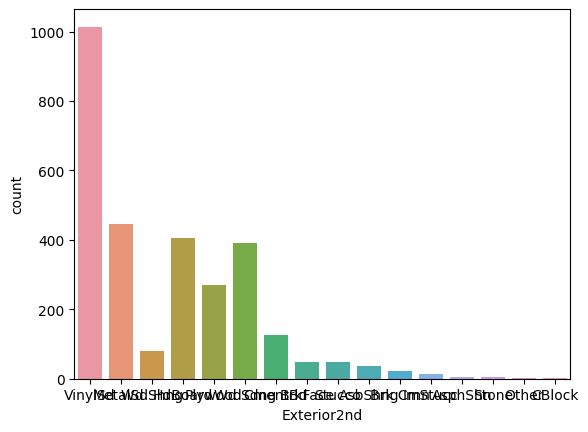

         MasVnrType  Ratio
None           1742  0.597
BrkFace         879  0.301
Stone           249  0.085
BrkCmn           25  0.009


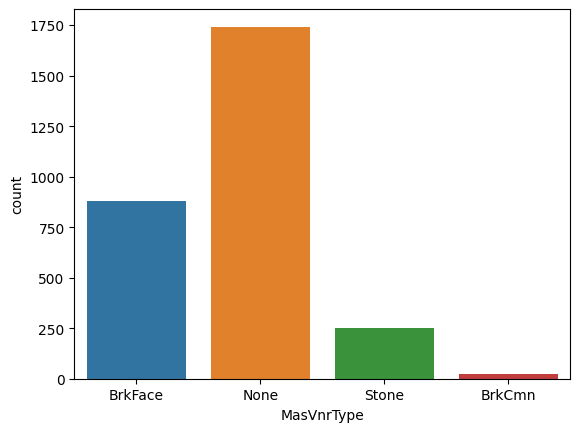

    ExterQual  Ratio
TA       1798  0.616
Gd        979  0.335
Ex        107  0.037
Fa         35  0.012


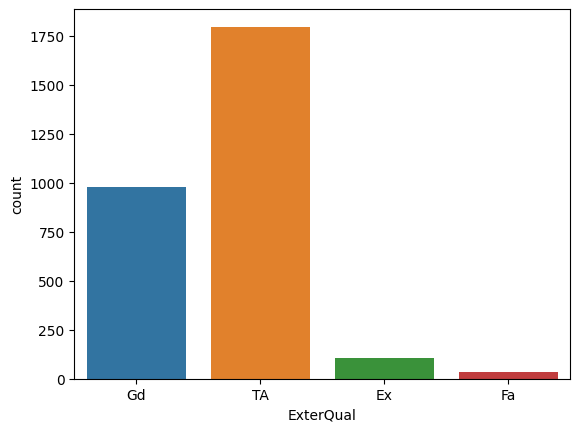

    ExterCond  Ratio
TA       2538  0.869
Gd        299  0.102
Fa         67  0.023
Ex         12  0.004
Po          3  0.001


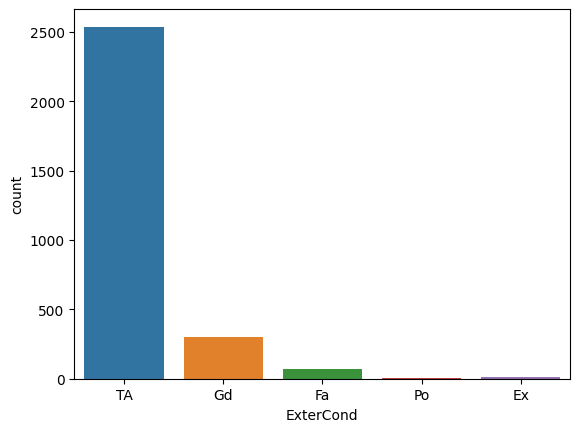

        Foundation  Ratio
PConc         1308  0.448
CBlock        1235  0.423
BrkTil         311  0.107
Slab            49  0.017
Stone           11  0.004
Wood             5  0.002


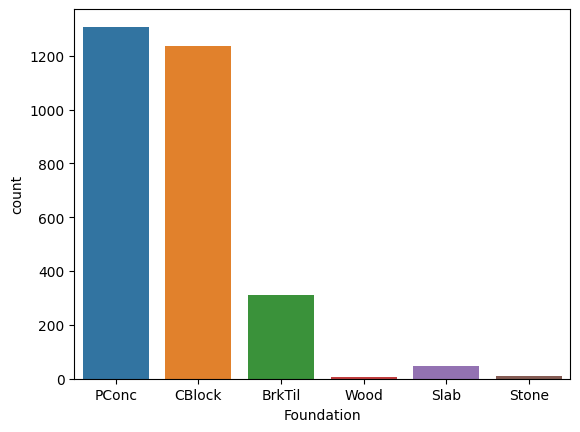

    BsmtQual  Ratio
TA      1283  0.440
Gd      1209  0.414
Ex       258  0.088
Fa        88  0.030


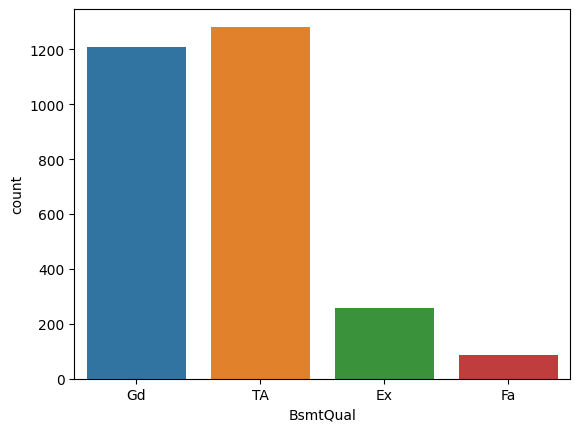

    BsmtCond  Ratio
TA      2606  0.893
Gd       122  0.042
Fa       104  0.036
Po         5  0.002


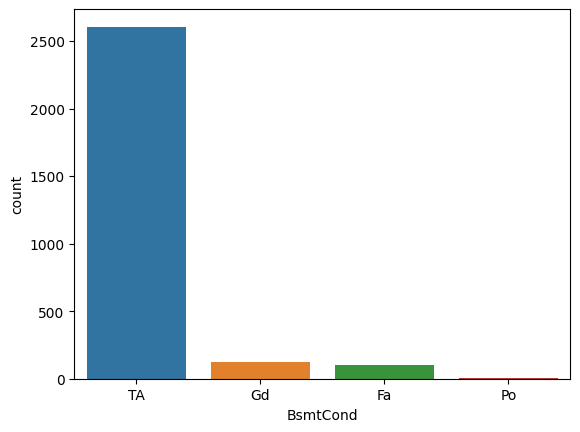

    BsmtExposure  Ratio
No          1904  0.652
Av           418  0.143
Gd           276  0.095
Mn           239  0.082


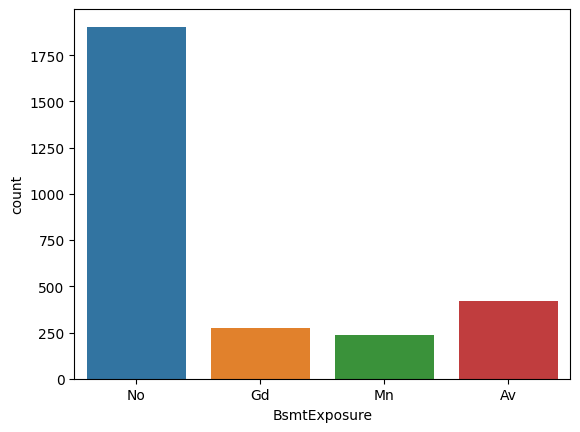

     BsmtFinType1  Ratio
Unf           851  0.292
GLQ           849  0.291
ALQ           429  0.147
Rec           288  0.099
BLQ           269  0.092
LwQ           154  0.053


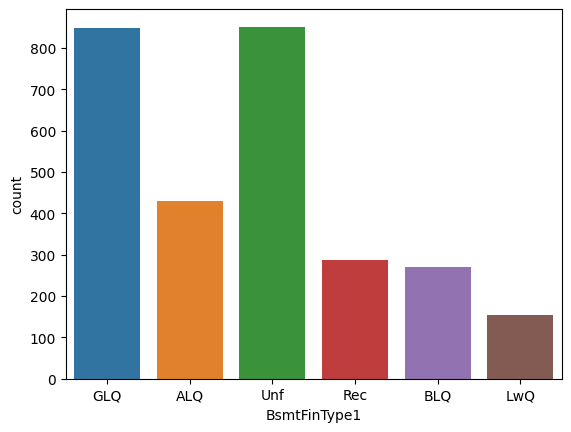

     BsmtFinType2  Ratio
Unf          2493  0.854
Rec           105  0.036
LwQ            87  0.030
BLQ            68  0.023
ALQ            52  0.018
GLQ            34  0.012


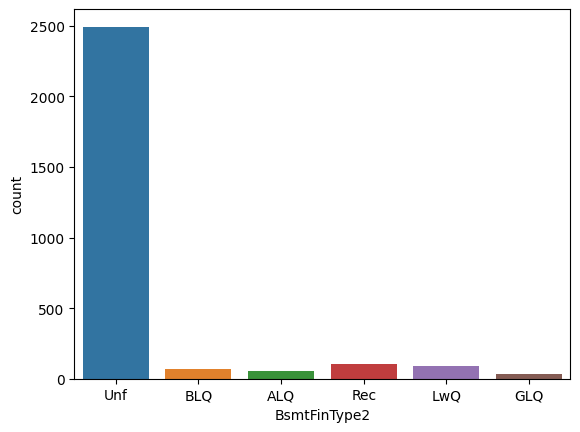

       Heating  Ratio
GasA      2874  0.985
GasW        27  0.009
Grav         9  0.003
Wall         6  0.002
OthW         2  0.001
Floor        1  0.000


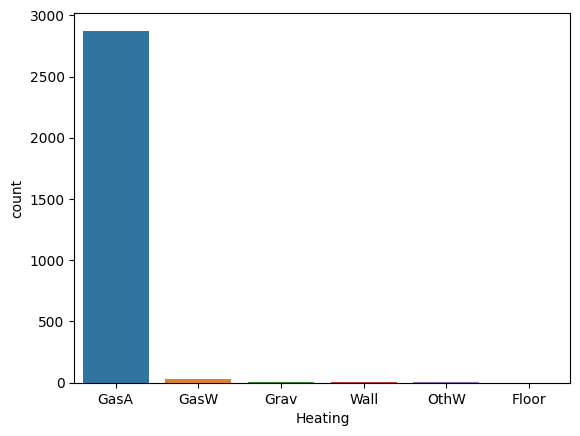

    HeatingQC  Ratio
Ex       1493  0.511
TA        857  0.294
Gd        474  0.162
Fa         92  0.032
Po          3  0.001


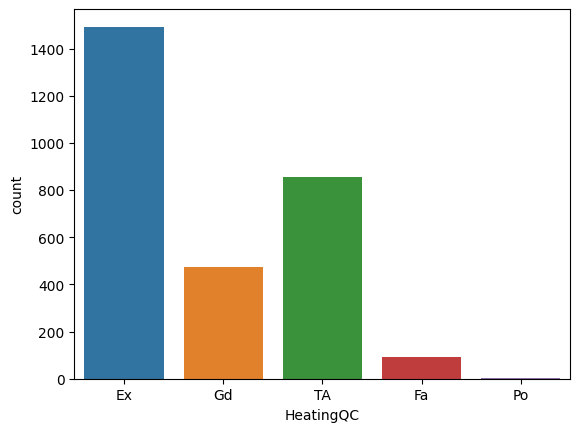

   CentralAir  Ratio
Y        2723  0.933
N         196  0.067


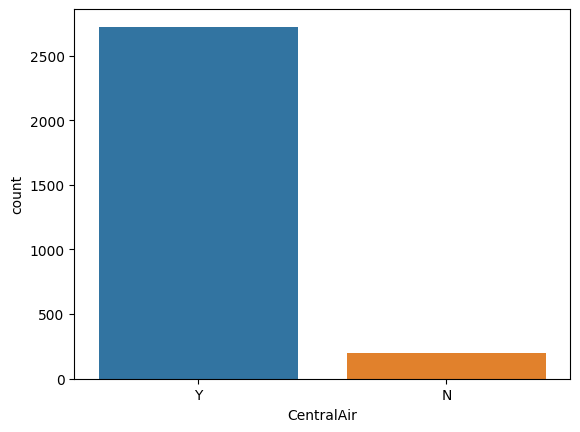

       Electrical  Ratio
SBrkr        2671  0.915
FuseA         188  0.064
FuseF          50  0.017
FuseP           8  0.003
Mix             1  0.000


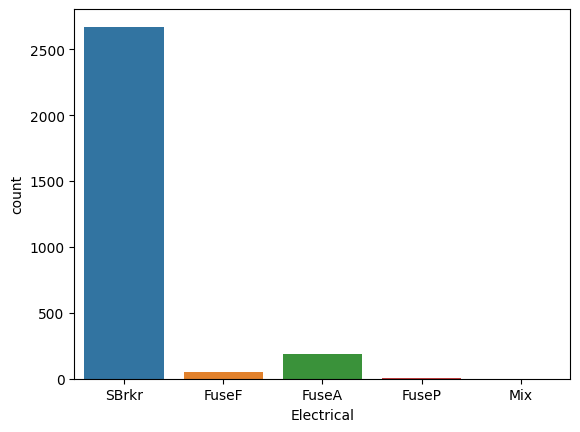

    KitchenQual  Ratio
TA         1492  0.511
Gd         1151  0.394
Ex          205  0.070
Fa           70  0.024


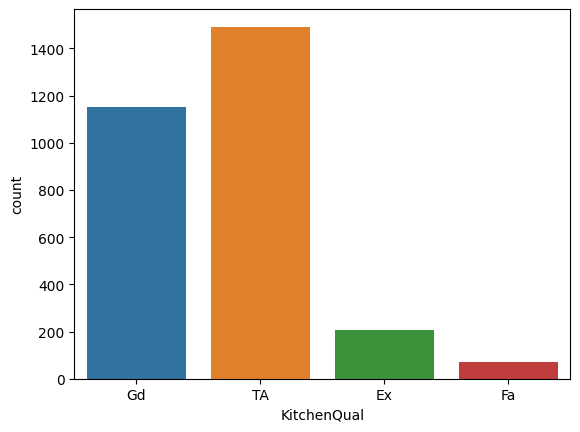

      Functional  Ratio
Typ         2717  0.931
Min2          70  0.024
Min1          65  0.022
Mod           35  0.012
Maj1          19  0.007
Maj2           9  0.003
Sev            2  0.001


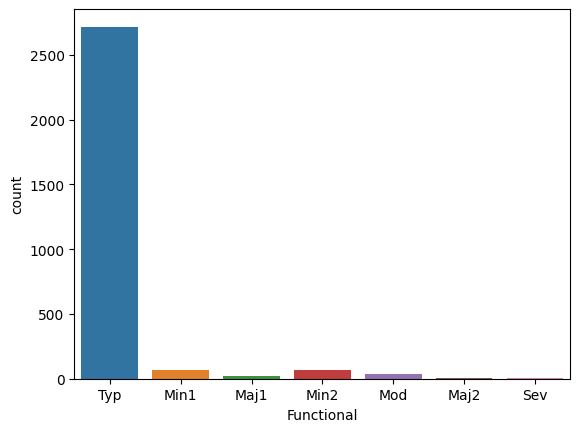

    FireplaceQu  Ratio
Gd          744  0.255
TA          592  0.203
Fa           74  0.025
Po           46  0.016
Ex           43  0.015


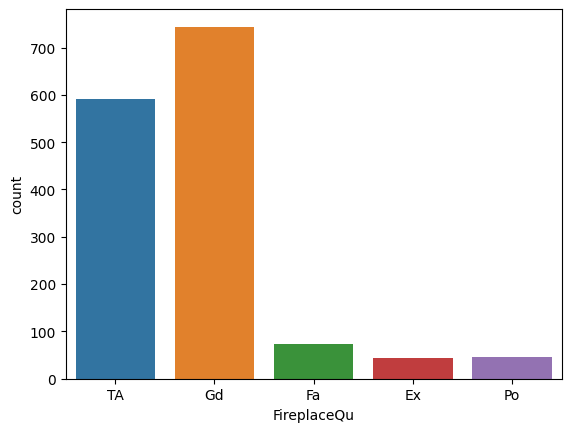

         GarageType  Ratio
Attchd         1723  0.590
Detchd          779  0.267
BuiltIn         186  0.064
Basment          36  0.012
2Types           23  0.008
CarPort          15  0.005


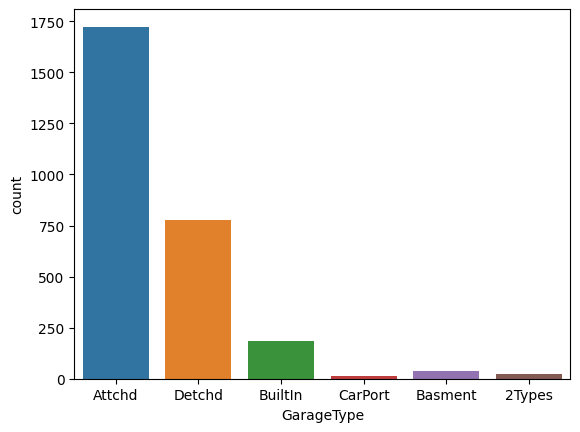

     GarageFinish  Ratio
Unf          1230  0.421
RFn           811  0.278
Fin           719  0.246


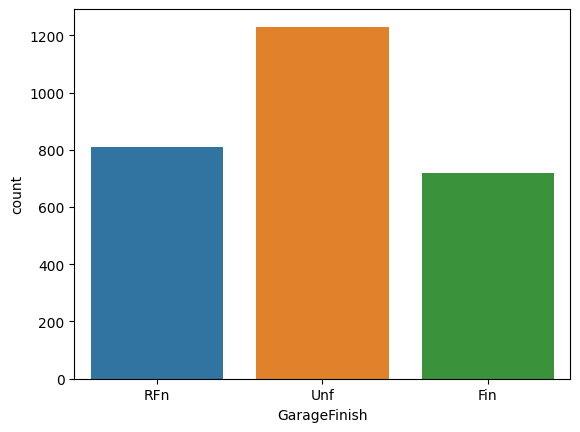

    GarageQual  Ratio
TA        2604  0.892
Fa         124  0.042
Gd          24  0.008
Po           5  0.002
Ex           3  0.001


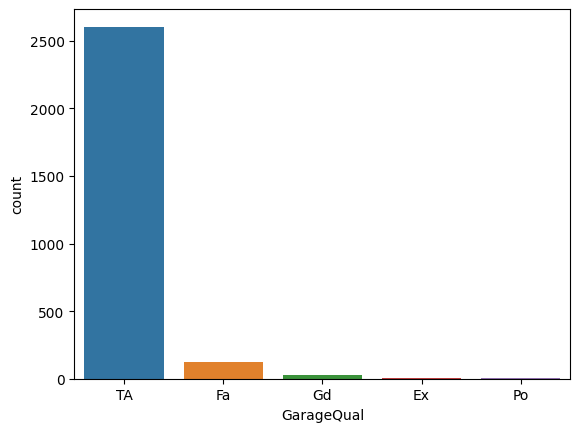

    GarageCond  Ratio
TA        2654  0.909
Fa          74  0.025
Gd          15  0.005
Po          14  0.005
Ex           3  0.001


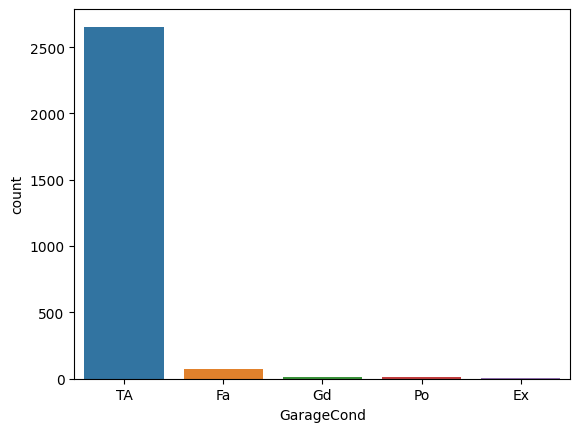

   PavedDrive  Ratio
Y        2641  0.905
N         216  0.074
P          62  0.021


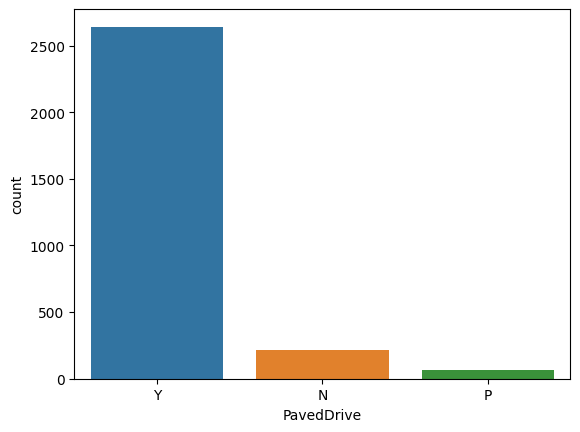

    PoolQC  Ratio
Ex       4  0.001
Gd       4  0.001
Fa       2  0.001


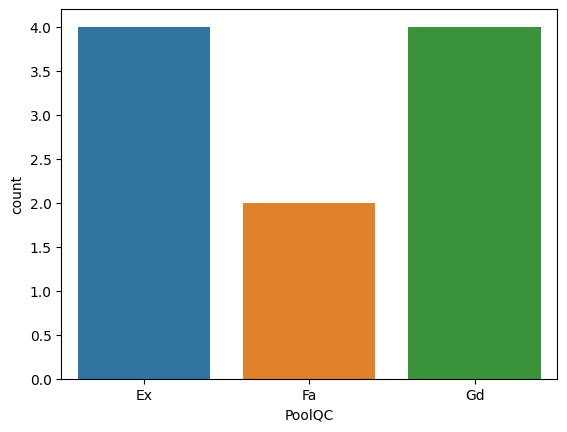

       Fence  Ratio
MnPrv    329  0.113
GdPrv    118  0.040
GdWo     112  0.038
MnWw      12  0.004


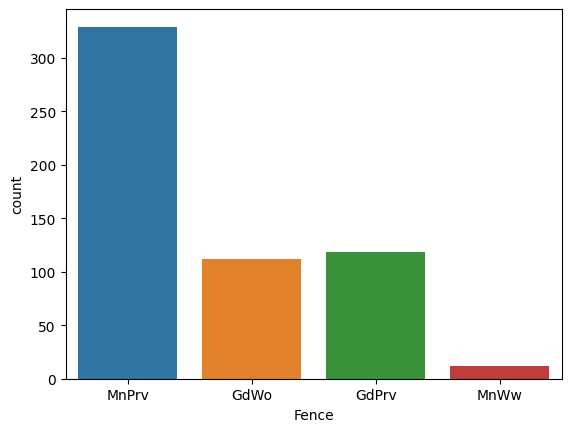

      MiscFeature  Ratio
Shed           95  0.033
Gar2            5  0.002
Othr            4  0.001
TenC            1  0.000


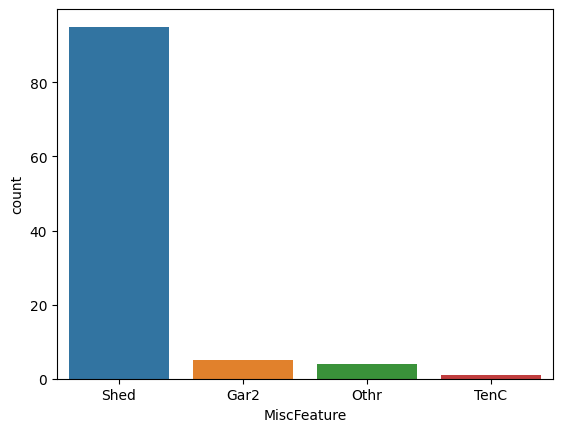

       SaleType  Ratio
WD         2525  0.865
New         239  0.082
COD          87  0.030
ConLD        26  0.009
CWD          12  0.004
ConLI         9  0.003
ConLw         8  0.003
Oth           7  0.002
Con           5  0.002


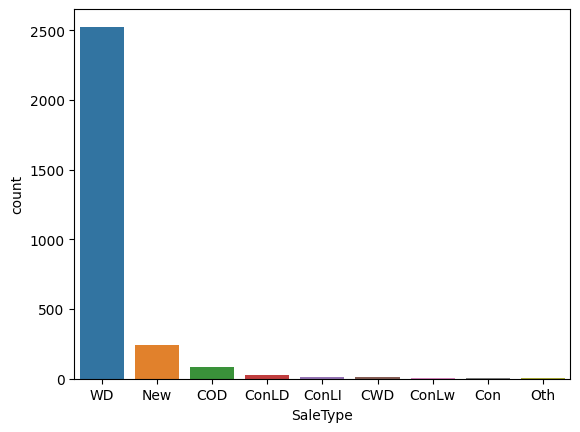

         SaleCondition  Ratio
Normal            2402  0.823
Partial            245  0.084
Abnorml            190  0.065
Family              46  0.016
Alloca              24  0.008
AdjLand             12  0.004


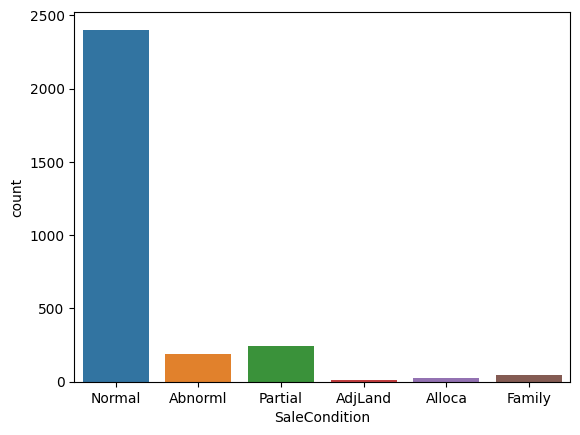

   OverallCond  Ratio
5         1645  0.564
6          531  0.182
7          390  0.134
8          144  0.049
4          101  0.035
3           50  0.017
9           41  0.014
2           10  0.003
1            7  0.002


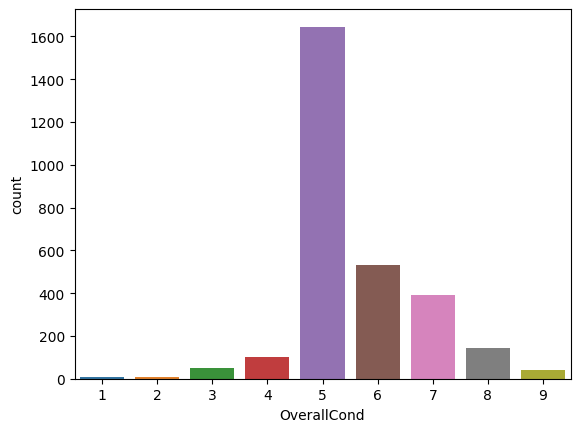

       BsmtFullBath  Ratio
0.000          1705  0.584
1.000          1172  0.402
2.000            38  0.013
3.000             2  0.001


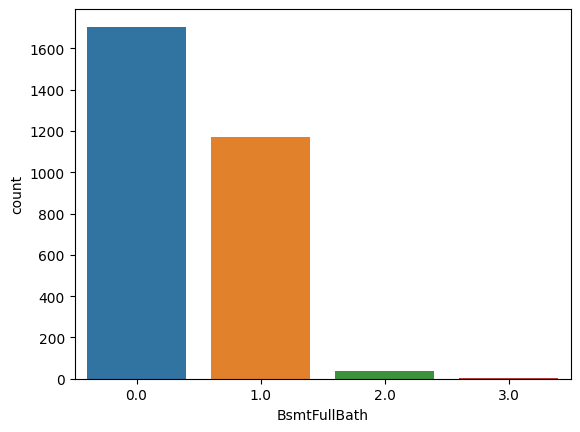

       BsmtHalfBath  Ratio
0.000          2742  0.939
1.000           171  0.059
2.000             4  0.001


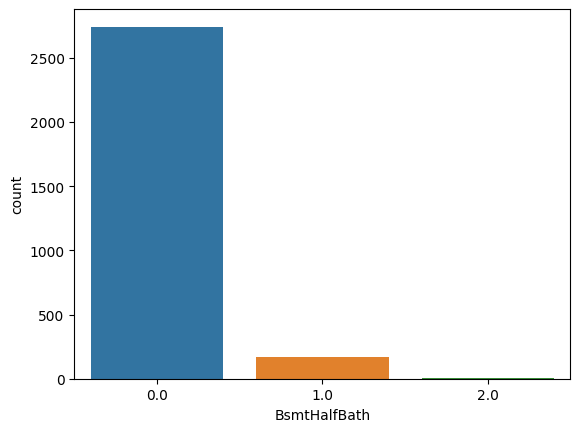

   FullBath  Ratio
2      1530  0.524
1      1309  0.448
3        64  0.022
0        12  0.004
4         4  0.001


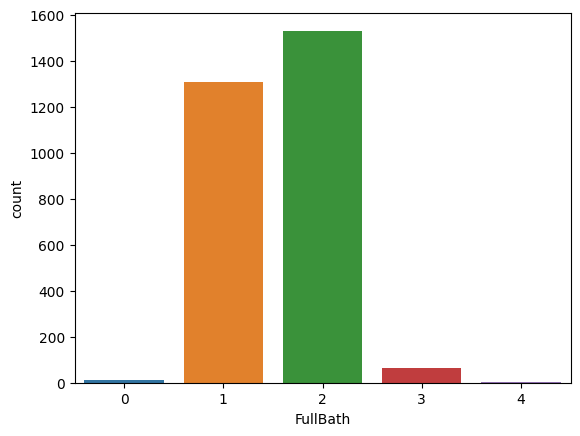

   HalfBath  Ratio
0      1834  0.628
1      1060  0.363
2        25  0.009


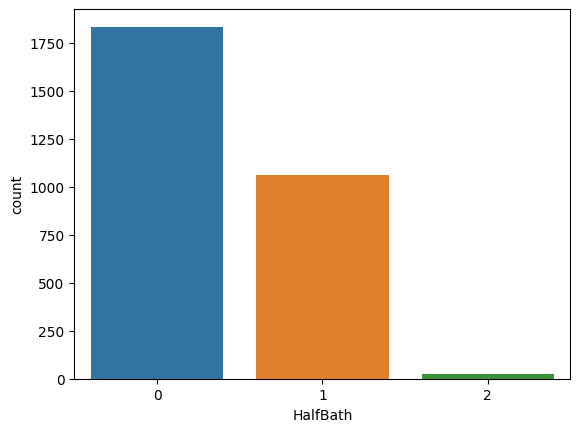

   BedroomAbvGr  Ratio
3          1596  0.547
2           742  0.254
4           400  0.137
1           103  0.035
5            48  0.016
6            21  0.007
0             8  0.003
8             1  0.000


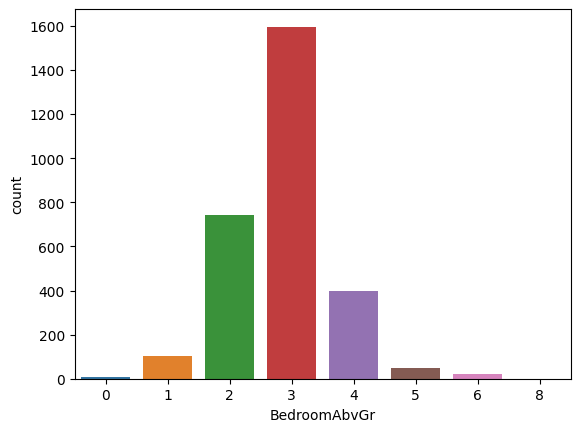

   KitchenAbvGr  Ratio
1          2785  0.954
2           129  0.044
0             3  0.001
3             2  0.001


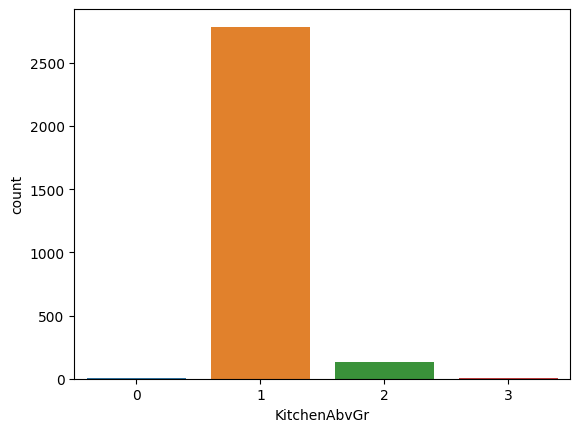

   Fireplaces  Ratio
0        1420  0.486
1        1268  0.434
2         219  0.075
3          11  0.004
4           1  0.000


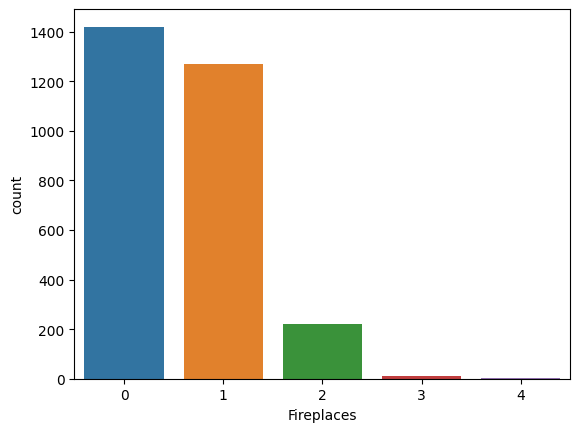

       GarageCars  Ratio
2.000        1594  0.546
1.000         776  0.266
3.000         374  0.128
0.000         157  0.054
4.000          16  0.005
5.000           1  0.000


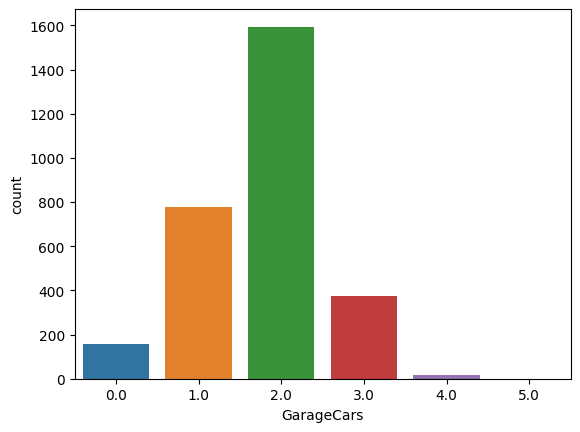

      YrSold  Ratio
2007     692  0.237
2009     647  0.222
2008     622  0.213
2006     619  0.212
2010     339  0.116


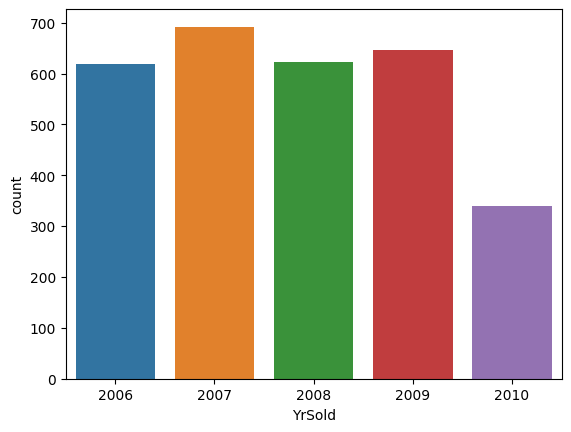

In [11]:
for col in cat_cols:
    categorical_summary(df,col,True)

In [12]:
def numerical_summary(dataframe, col_name, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)
    
    if plot:
        dataframe[col_name].hist(bins = 20)
        plt.title(col_name)
        plt.xlabel(col_name)
        plt.show()

count   2919.000
mean    1460.000
std      842.787
min        1.000
5%       146.900
10%      292.800
20%      584.600
30%      876.400
40%     1168.200
50%     1460.000
60%     1751.800
70%     2043.600
80%     2335.400
90%     2627.200
95%     2773.100
99%     2889.820
max     2919.000
Name: Id, dtype: float64


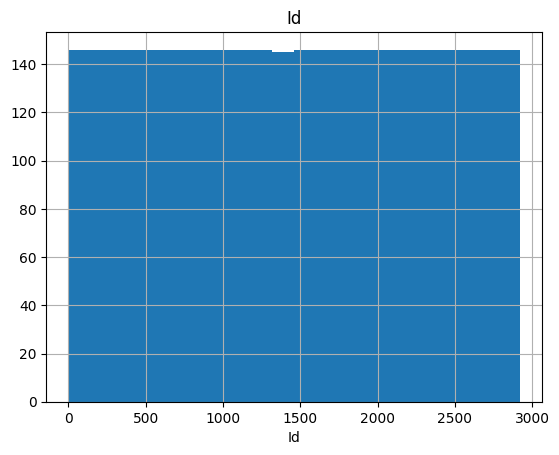

count   2919.000
mean      57.138
std       42.518
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


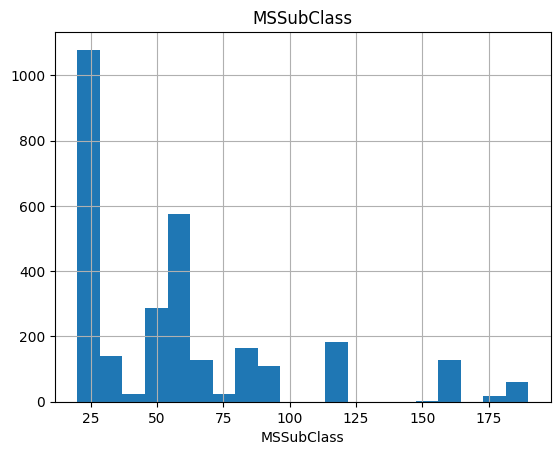

count   2433.000
mean      69.306
std       23.345
min       21.000
5%        32.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       68.000
60%       73.000
70%       78.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
max      313.000
Name: LotFrontage, dtype: float64


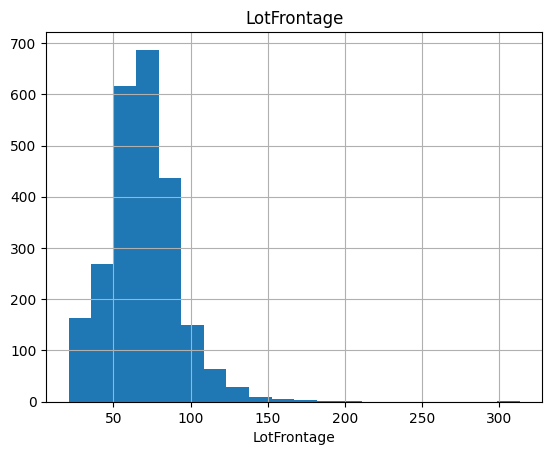

count     2919.000
mean     10168.114
std       7886.996
min       1300.000
5%        3182.000
10%       4922.400
20%       7007.600
30%       7960.400
40%       8741.000
50%       9453.000
60%      10151.600
70%      11001.200
80%      12203.800
90%      14300.600
95%      17142.900
99%      33038.640
max     215245.000
Name: LotArea, dtype: float64


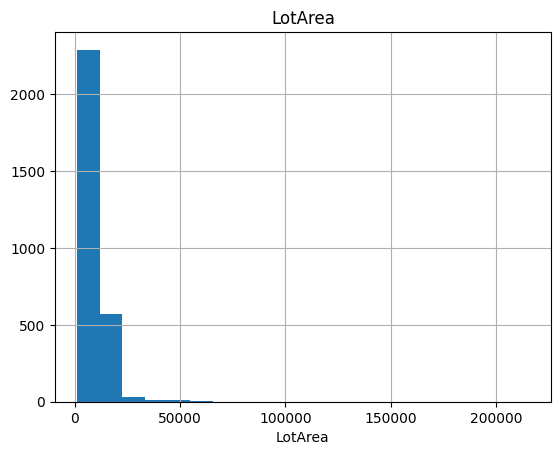

count   2919.000
mean       6.089
std        1.410
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
max       10.000
Name: OverallQual, dtype: float64


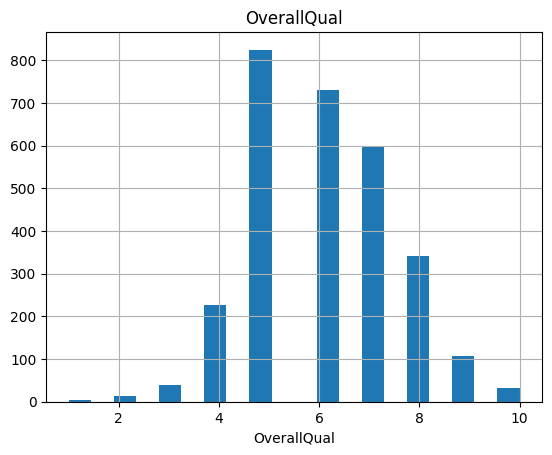

count   2919.000
mean    1971.313
std       30.291
min     1872.000
5%      1915.000
10%     1924.000
20%     1947.000
30%     1957.000
40%     1965.000
50%     1973.000
60%     1984.000
70%     1998.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2008.000
max     2010.000
Name: YearBuilt, dtype: float64


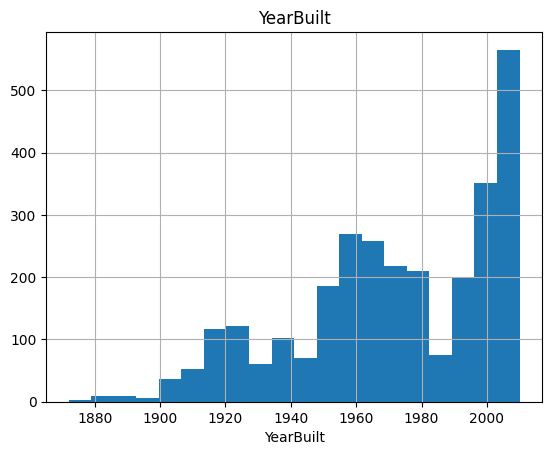

count   2919.000
mean    1984.264
std       20.894
min     1950.000
5%      1950.000
10%     1950.000
20%     1960.000
30%     1970.000
40%     1978.000
50%     1993.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.200
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


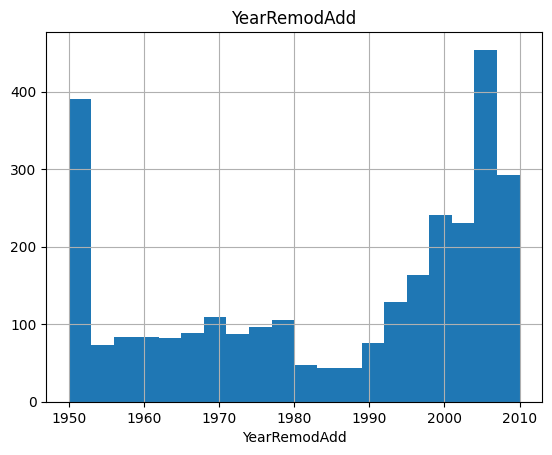

count   2896.000
mean     102.201
std      179.334
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%      120.000
80%      202.000
90%      325.500
95%      466.500
99%      771.050
max     1600.000
Name: MasVnrArea, dtype: float64


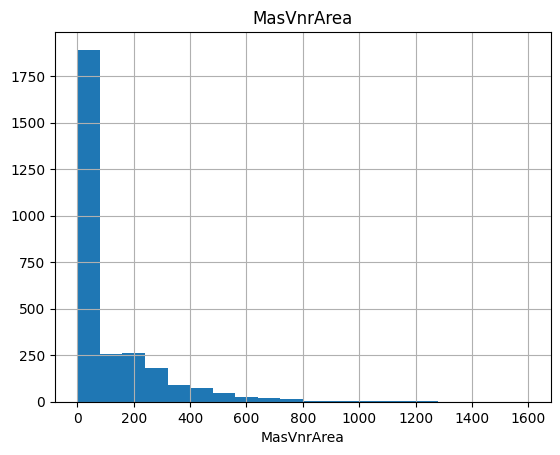

count   2918.000
mean     441.423
std      455.611
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      202.600
50%      368.500
60%      515.200
70%      656.000
80%      812.000
90%     1056.900
95%     1274.000
99%     1635.320
max     5644.000
Name: BsmtFinSF1, dtype: float64


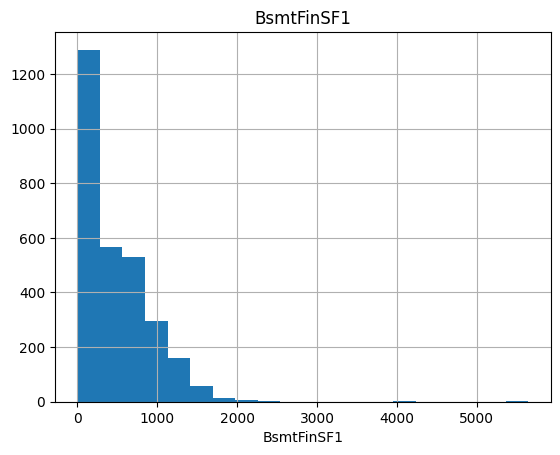

count   2918.000
mean      49.582
std      169.206
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      125.600
95%      435.000
99%      874.660
max     1526.000
Name: BsmtFinSF2, dtype: float64


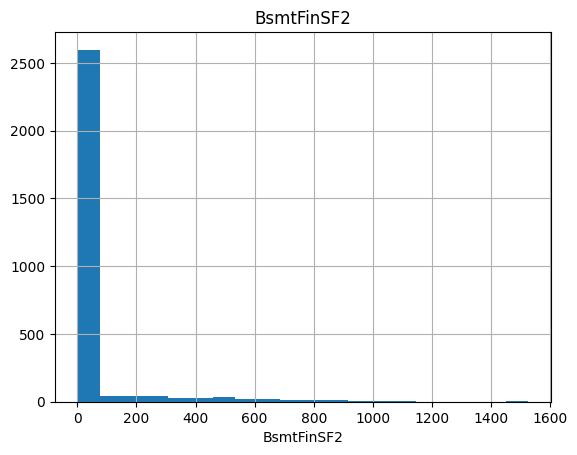

count   2918.000
mean     560.772
std      439.544
min        0.000
5%         0.000
10%       56.000
20%      174.000
30%      270.000
40%      365.800
50%      467.000
60%      595.000
70%      732.000
80%      892.600
90%     1212.600
95%     1474.900
99%     1776.490
max     2336.000
Name: BsmtUnfSF, dtype: float64


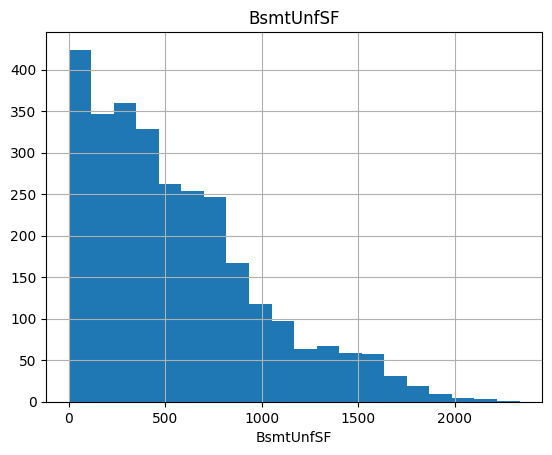

count   2918.000
mean    1051.778
std      440.766
min        0.000
5%       455.250
10%      600.000
20%      741.000
30%      836.000
40%      911.000
50%      989.500
60%     1089.200
70%     1216.000
80%     1392.000
90%     1614.000
95%     1776.150
99%     2198.300
max     6110.000
Name: TotalBsmtSF, dtype: float64


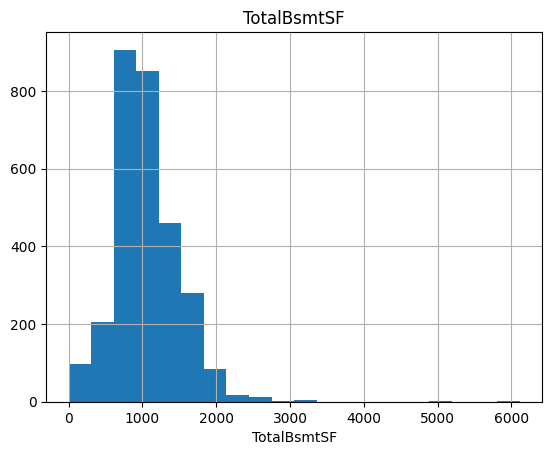

count   2919.000
mean    1159.582
std      392.362
min      334.000
5%       665.900
10%      744.800
20%      847.000
30%      914.000
40%      996.200
50%     1082.000
60%     1180.000
70%     1314.000
80%     1483.400
90%     1675.000
95%     1830.100
99%     2288.020
max     5095.000
Name: 1stFlrSF, dtype: float64


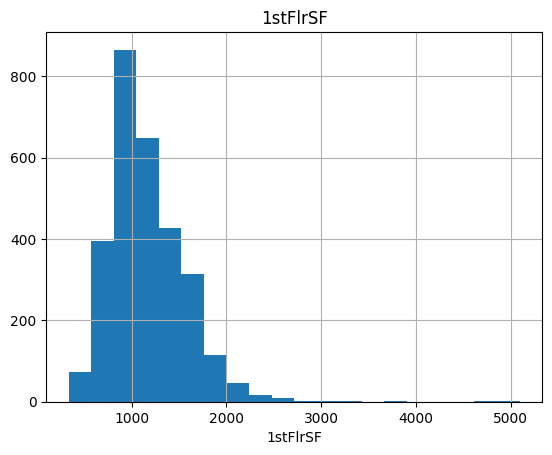

count   2919.000
mean     336.484
std      428.701
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      427.400
70%      636.000
80%      770.800
90%      925.000
95%     1131.200
99%     1400.200
max     2065.000
Name: 2ndFlrSF, dtype: float64


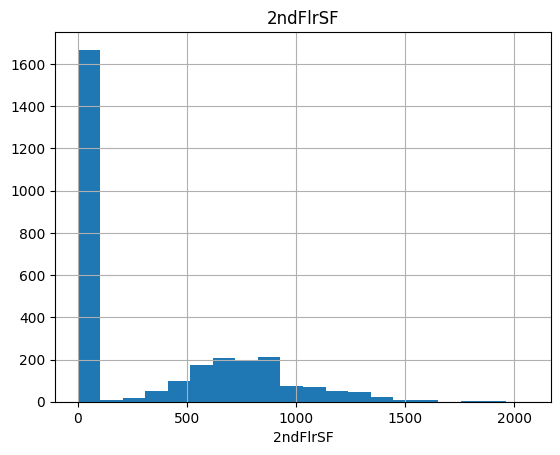

count   2919.000
mean       4.694
std       46.397
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      153.840
max     1064.000
Name: LowQualFinSF, dtype: float64


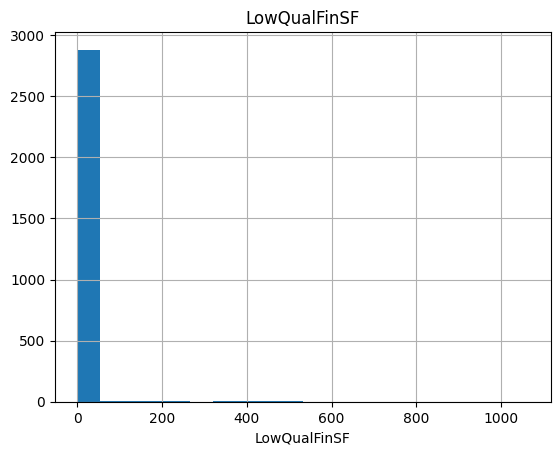

count   2919.000
mean    1500.760
std      506.051
min      334.000
5%       861.000
10%      923.800
20%     1064.600
30%     1200.000
40%     1329.200
50%     1444.000
60%     1560.000
70%     1680.000
80%     1838.400
90%     2153.200
95%     2464.200
99%     2935.720
max     5642.000
Name: GrLivArea, dtype: float64


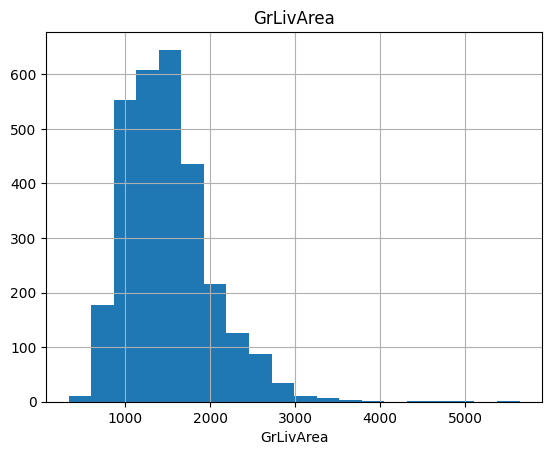

count   2919.000
mean       6.452
std        1.569
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        8.000
95%        9.000
99%       11.000
max       15.000
Name: TotRmsAbvGrd, dtype: float64


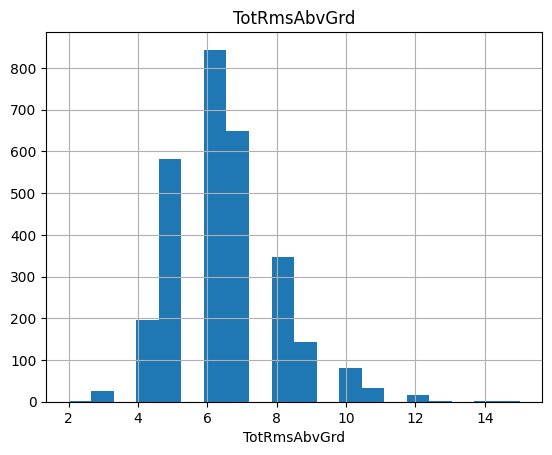

count   2760.000
mean    1978.113
std       25.574
min     1895.000
5%      1928.000
10%     1941.000
20%     1957.000
30%     1964.000
40%     1972.000
50%     1979.000
60%     1993.000
70%     1999.000
80%     2004.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2207.000
Name: GarageYrBlt, dtype: float64


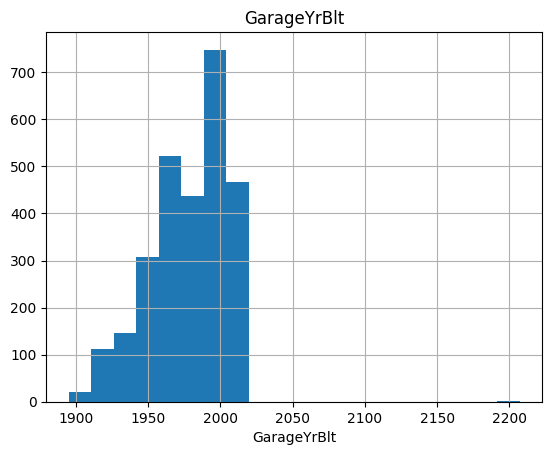

count   2918.000
mean     472.875
std      215.395
min        0.000
5%         0.000
10%      240.000
20%      296.000
30%      379.000
40%      440.000
50%      480.000
60%      513.000
70%      560.900
80%      621.000
90%      758.000
95%      856.150
99%     1019.490
max     1488.000
Name: GarageArea, dtype: float64


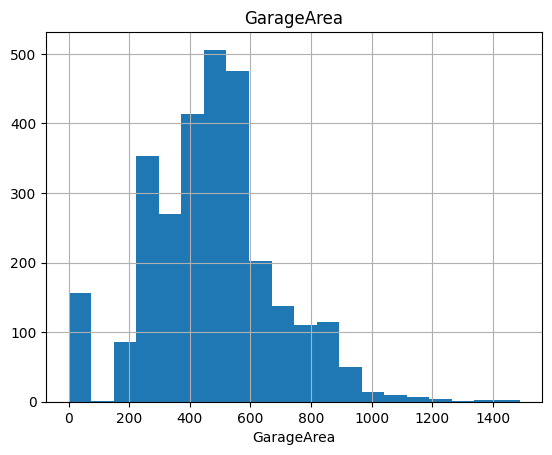

count   2919.000
mean      93.710
std      126.527
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      257.000
95%      328.000
99%      500.820
max     1424.000
Name: WoodDeckSF, dtype: float64


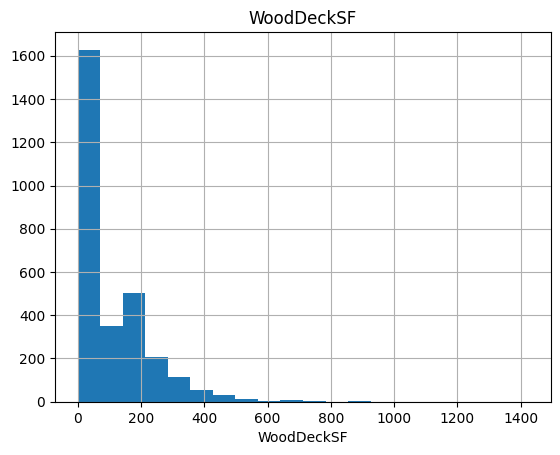

count   2919.000
mean      47.487
std       67.575
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       26.000
60%       40.000
70%       58.000
80%       85.000
90%      131.200
95%      183.100
99%      284.460
max      742.000
Name: OpenPorchSF, dtype: float64


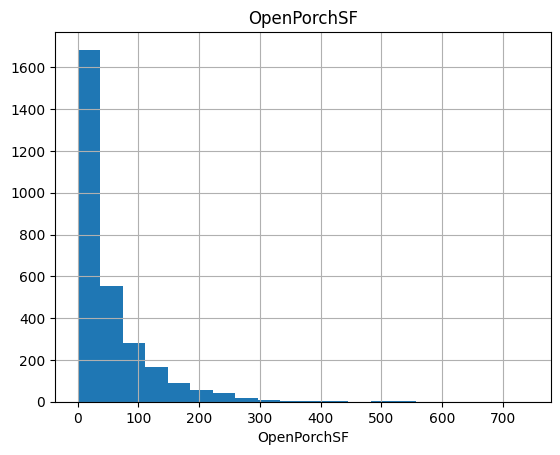

count   2919.000
mean      23.098
std       64.244
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      176.000
99%      264.000
max     1012.000
Name: EnclosedPorch, dtype: float64


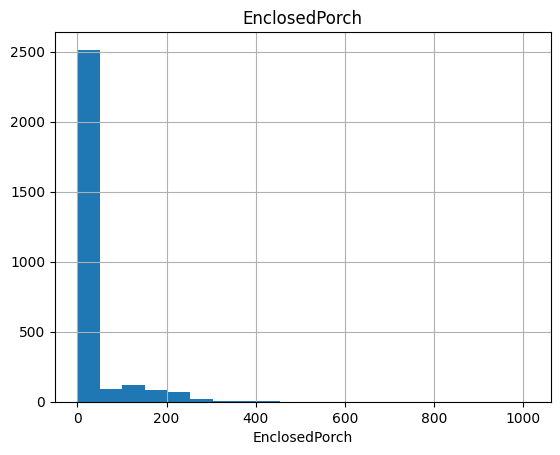

count   2919.000
mean       2.602
std       25.188
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      144.000
max      508.000
Name: 3SsnPorch, dtype: float64


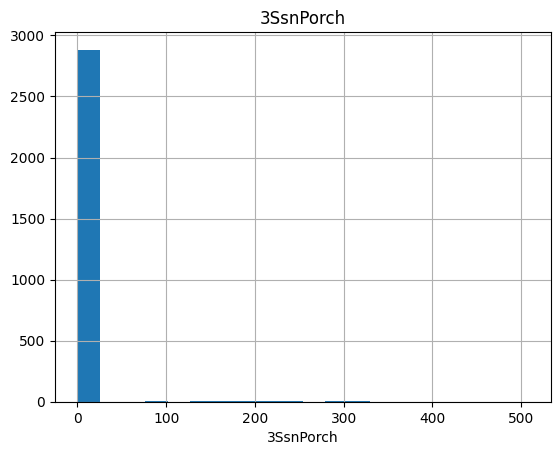

count   2919.000
mean      16.062
std       56.184
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      161.000
99%      259.820
max      576.000
Name: ScreenPorch, dtype: float64


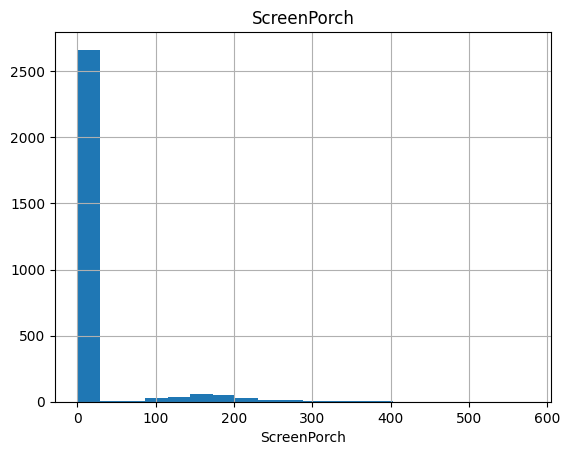

count   2919.000
mean       2.252
std       35.664
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%        0.000
max      800.000
Name: PoolArea, dtype: float64


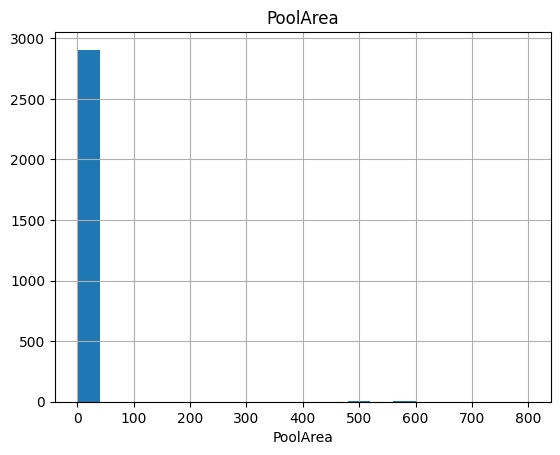

count    2919.000
mean       50.826
std       567.402
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       982.000
max     17000.000
Name: MiscVal, dtype: float64


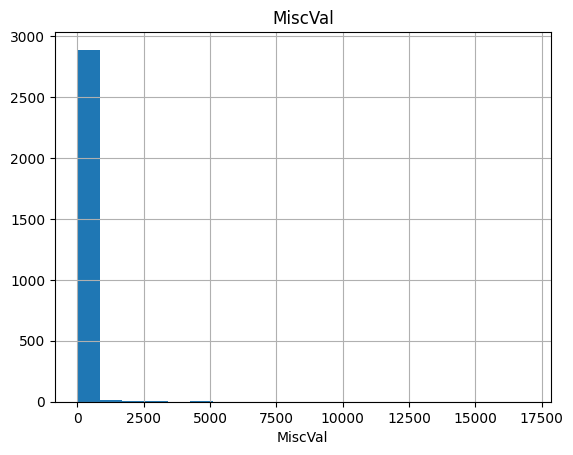

count   2919.000
mean       6.213
std        2.715
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


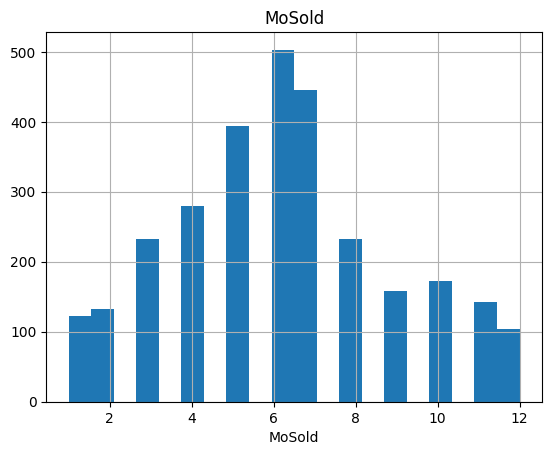

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
20%     124000.000
30%     135500.000
40%     147000.000
50%     163000.000
60%     179280.000
70%     198620.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64


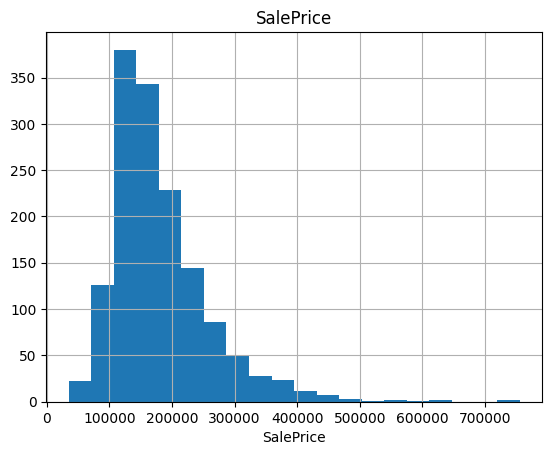

In [13]:
for col in num_cols:
    numerical_summary(df,col,True)

## Perform the target variable analysis with categorical variables.

In [14]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [15]:
for col in cat_cols:
    target_summary_with_cat(df, "SalePrice", col)

          TARGET_MEAN
MSZoning             
C (all)     74528.000
FV         214014.062
RH         131558.375
RL         191004.995
RM         126316.830


        TARGET_MEAN
Street             
Grvl     130190.500
Pave     181130.539


       TARGET_MEAN
Alley             
Grvl    122219.080
Pave    168000.585


          TARGET_MEAN
LotShape             
IR1        206101.665
IR2        239833.366
IR3        216036.500
Reg        164754.818


             TARGET_MEAN
LandContour             
Bnk           143104.079
HLS           231533.940
Low           203661.111
Lvl           180183.747


           TARGET_MEAN
Utilities             
AllPub      180950.957
NoSeWa      137500.000


           TARGET_MEAN
LotConfig             
Corner      181623.426
CulDSac     223854.617
FR2         177934.574
FR3         208475.000
Inside      176938.048


           TARGET_MEAN
LandSlope             
Gtl         179956.800
Mod         196734.138
Sev         204379.231


            TARGET_MEAN


## Check if there are any outliers.

In [16]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    interquartile = quartile3 - quartile1
    up = quartile3 + 1.5 * interquartile 
    low = quartile1 - 1.5 * interquartile
    return low, up

In [17]:
def check_outlier(dataframe, col_name):
    low, up = outlier_thresholds(dataframe, col_name,0.05,0.95)
    
    if dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < low)].any(axis= None):
        return True
    else:
        return False

In [18]:
for col in num_cols:
    print(col, check_outlier(df,col))

Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd False
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False
SalePrice True


In [19]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds (dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [20]:
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df,col)

In [21]:
for col in num_cols:
    print(col, check_outlier(df,col))

Id False
MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
PoolArea False
MiscVal False
MoSold False
SalePrice True


## Check if there are any missing observations.

In [22]:
df.isnull().values.any()

True

In [23]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    missing_df = pd.concat([n_miss,ratio], axis = 1, keys = ["n_miss","ratio"])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns

In [24]:
missing_values_table(df)

              n_miss  ratio
PoolQC          2909 99.657
MiscFeature     2814 96.403
Alley           2721 93.217
Fence           2348 80.439
SalePrice       1459 49.983
FireplaceQu     1420 48.647
LotFrontage      486 16.650
GarageCond       159  5.447
GarageYrBlt      159  5.447
GarageFinish     159  5.447
GarageQual       159  5.447
GarageType       157  5.379
BsmtExposure      82  2.809
BsmtCond          82  2.809
BsmtQual          81  2.775
BsmtFinType2      80  2.741
BsmtFinType1      79  2.706
MasVnrType        24  0.822
MasVnrArea        23  0.788
MSZoning           4  0.137
Functional         2  0.069
BsmtHalfBath       2  0.069
BsmtFullBath       2  0.069
Utilities          2  0.069
KitchenQual        1  0.034
TotalBsmtSF        1  0.034
BsmtUnfSF          1  0.034
GarageCars         1  0.034
GarageArea         1  0.034
BsmtFinSF2         1  0.034
BsmtFinSF1         1  0.034
Exterior2nd        1  0.034
Exterior1st        1  0.034
SaleType           1  0.034
Electrical         1

In [25]:
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [26]:
for col in no_cols:
    df[col].fillna("No", inplace = True)

In [27]:
missing_values_table(df)

              n_miss  ratio
SalePrice       1459 49.983
LotFrontage      486 16.650
GarageYrBlt      159  5.447
MasVnrType        24  0.822
MasVnrArea        23  0.788
MSZoning           4  0.137
BsmtFullBath       2  0.069
BsmtHalfBath       2  0.069
Functional         2  0.069
Utilities          2  0.069
Exterior2nd        1  0.034
BsmtFinSF1         1  0.034
BsmtFinSF2         1  0.034
BsmtUnfSF          1  0.034
Exterior1st        1  0.034
Electrical         1  0.034
KitchenQual        1  0.034
GarageCars         1  0.034
GarageArea         1  0.034
SaleType           1  0.034
TotalBsmtSF        1  0.034


In [28]:
df.drop(['MasVnrType'], axis=1, inplace = True)

In [29]:
missing_values_table(df)

              n_miss  ratio
SalePrice       1459 49.983
LotFrontage      486 16.650
GarageYrBlt      159  5.447
MasVnrArea        23  0.788
MSZoning           4  0.137
BsmtFullBath       2  0.069
BsmtHalfBath       2  0.069
Functional         2  0.069
Utilities          2  0.069
Exterior2nd        1  0.034
BsmtFinSF1         1  0.034
BsmtFinSF2         1  0.034
BsmtUnfSF          1  0.034
TotalBsmtSF        1  0.034
Exterior1st        1  0.034
KitchenQual        1  0.034
GarageCars         1  0.034
GarageArea         1  0.034
SaleType           1  0.034
Electrical         1  0.034


In [30]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Variables with missing values are listed

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Number of missing values of variables before implementation

    # fill nulls with mode if variable object and number of classes is less than or equal to cat_length
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # If num_method is mean, the null values of non-object type variables are filled with the mean
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # If num_method is median, null values of non-object type variables are filled with mean
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [31]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType           0
SalePrice       1459
dtype: int64 


## Perform correlation analysis.

In [32]:
df[num_cols].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
Id,1.000,0.009,-0.028,-0.012,-0.030,-0.017,-0.050,-0.027,-0.019,NaN,-0.013,-0.026,-0.013,-0.022,NaN,-0.029,-0.031,-0.029,-0.011,-0.014,0.001,NaN,NaN,NaN,NaN,NaN,0.006,-0.022
MSSubClass,0.009,1.000,-0.434,-0.437,0.063,0.060,0.064,0.019,-0.069,NaN,-0.119,-0.225,-0.253,0.331,NaN,0.097,0.046,0.105,-0.089,-0.013,-0.005,NaN,NaN,NaN,NaN,NaN,0.006,-0.064
LotFrontage,-0.028,-0.434,1.000,0.602,0.218,0.133,0.089,0.217,0.167,NaN,0.125,0.323,0.417,0.025,NaN,0.339,0.336,0.084,0.351,0.112,0.151,NaN,NaN,NaN,NaN,NaN,0.010,0.369
LotArea,-0.012,-0.437,0.602,1.000,0.192,0.083,0.073,0.167,0.213,NaN,0.079,0.341,0.463,0.068,NaN,0.410,0.366,0.048,0.351,0.190,0.157,NaN,NaN,NaN,NaN,NaN,0.002,0.432
OverallQual,-0.030,0.063,0.218,0.192,1.000,0.599,0.572,0.438,0.274,NaN,0.272,0.550,0.483,0.245,NaN,0.582,0.397,0.548,0.573,0.269,0.354,NaN,NaN,NaN,NaN,NaN,0.029,0.792
YearBuilt,-0.017,0.060,0.133,0.083,0.599,1.000,0.613,0.341,0.282,NaN,0.128,0.422,0.321,0.018,NaN,0.257,0.124,0.797,0.491,0.249,0.269,NaN,NaN,NaN,NaN,NaN,0.014,0.524
YearRemodAdd,-0.050,0.064,0.089,0.073,0.572,0.613,1.000,0.203,0.150,NaN,0.164,0.304,0.247,0.159,NaN,0.326,0.206,0.632,0.384,0.238,0.298,NaN,NaN,NaN,NaN,NaN,0.018,0.507
MasVnrArea,-0.027,0.019,0.217,0.167,0.438,0.341,0.203,1.000,0.290,NaN,0.082,0.385,0.384,0.098,NaN,0.374,0.270,0.266,0.383,0.177,0.179,NaN,NaN,NaN,NaN,NaN,0.004,0.449
BsmtFinSF1,-0.019,-0.069,0.167,0.213,0.274,0.282,0.150,0.290,1.000,NaN,-0.501,0.492,0.418,-0.173,NaN,0.164,0.026,0.190,0.297,0.225,0.107,NaN,NaN,NaN,NaN,NaN,0.003,0.401
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu", annot=True)
        plt.show(block=True)
    return drop_list

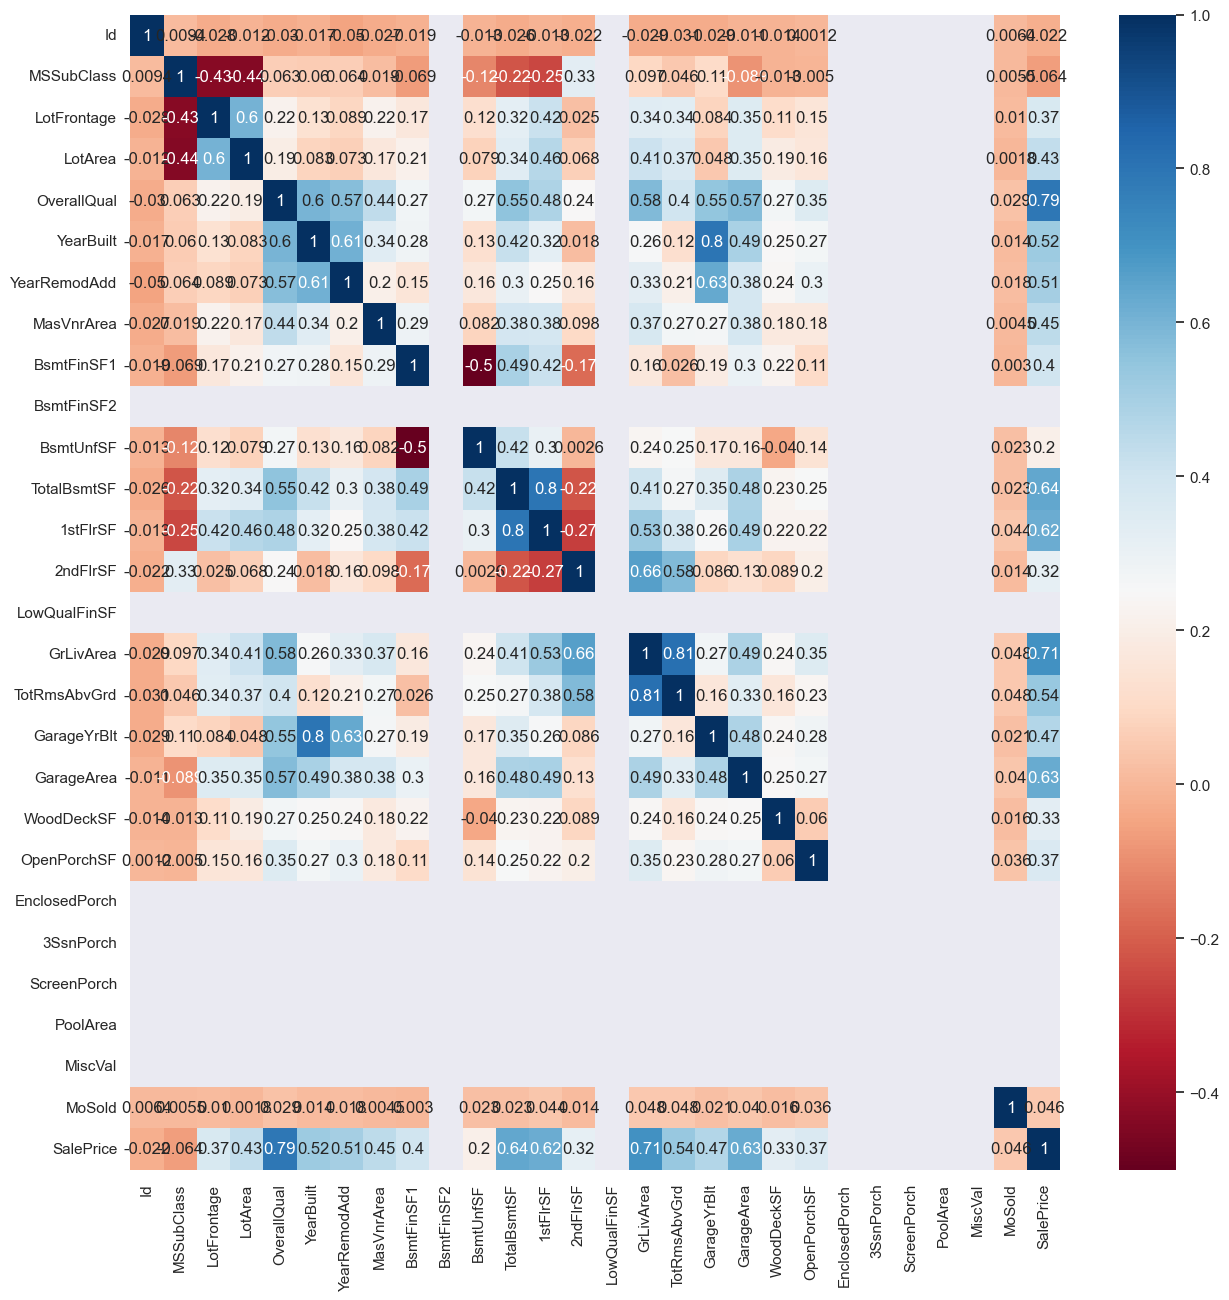

[]

In [34]:
high_correlated_cols(df[num_cols], plot=True)

In [35]:
df["_NEW_STREET_ALLEY_PAVED"] = df.apply(lambda x : 1 if (x["Street"] == "Pave") or(x["Alley"] == "Pave")  else 0 , axis = 1)

In [36]:
df["_NEW_STREET_ALLEY_GRAVEL"] = df.apply(lambda x : 1 if (x["Street"] == "Grvl") or(x["Alley"] == "Grvl")  else 0 , axis = 1)

In [37]:
df["_NEW_LandContour_LandSlope_LOW"] = df.apply(lambda x : 1 if (x["LandContour"] == "Lvl") or(x["LandSlope"] == "Gtl")  else 0 , axis = 1)

In [38]:
df["_NEW_LandContour_LandSlope_HIGH"] = df.apply(lambda x : 1 if (x["LandContour"] == "HLS") or(x["LandSlope"] == "Sev")  else 0 , axis = 1)

In [39]:
df["_NEW_OverallQual*OverallCond"] = df["OverallQual"] * df["OverallCond"] 

In [40]:
df["_NEW_OverallQual*OverallCond*YearBuilt*YearRemodAdd"] = df["OverallQual"] * df["OverallCond"] * df["YearBuilt"] * df["YearRemodAdd"] 

In [41]:
def calculate_new_exter_qual(row):
    if row["ExterQual"] == "Ex":
        return 5
    elif row["ExterQual"] == "Gd":
        return 4
    elif row["ExterQual"] == "TA":
        return 3
    elif row["ExterQual"] == "Fa":
        return 2
    elif row["ExterQual"] == "Po":
        return 1
    


df["_NEW_ExterQual"] = df.apply(calculate_new_exter_qual, axis=1)

In [42]:
def calculate_new_exter_cond(row):
    if row["ExterCond"] == "Ex":
        return 5
    elif row["ExterCond"] == "Gd":
        return 4
    elif row["ExterCond"] == "TA":
        return 3
    elif row["ExterCond"] == "Fa":
        return 2
    elif row["ExterCond"] == "Po":
        return 1
    


df["_NEW_ExterCond"] = df.apply(calculate_new_exter_cond, axis=1)

In [43]:
df["_NEW_ExterQual*ExterCond"] = df["_NEW_ExterQual"] * df["_NEW_ExterCond"]

In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,_NEW_STREET_ALLEY_PAVED,_NEW_STREET_ALLEY_GRAVEL,_NEW_LandContour_LandSlope_LOW,_NEW_LandContour_LandSlope_HIGH,_NEW_OverallQual*OverallCond,_NEW_OverallQual*OverallCond*YearBuilt*YearRemodAdd,_NEW_ExterQual,_NEW_ExterCond,_NEW_ExterQual*ExterCond
0,1,60,RL,65.000,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003.000,2003.000,Gable,CompShg,VinylSd,VinylSd,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856.000,854,0,1710.000,1.000,0.000,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500.000,1,0,1,0,35,140420315.000,4,3,12
1,2,20,RL,80.000,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976.000,1976.000,Gable,CompShg,MetalSd,MetalSd,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262.000,0,0,1262.000,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500.000,1,0,1,0,48,187419648.000,3,3,9
2,3,60,RL,68.000,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001.000,2002.000,Gable,CompShg,VinylSd,VinylSd,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920.000,866,0,1786.000,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500.000,1,0,1,0,35,140210070.000,4,3,12
3,4,70,RL,60.000,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915.000,1970.000,Gable,CompShg,Wd Sdng,Wd Shng,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961.000,756,0,1717.000,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,0,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000.000,1,0,1,0,35,132039250.000,3,3,9
4,5,60,RL,84.000,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000.000,2000.000,Gable,CompShg,VinylSd,VinylSd,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145.000,1053,0,2198.000,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000.000,1,0,1,0,40,160000000.000,4,3,12


In [45]:
def calculate_new_BsmtQual(row):
    if row["BsmtQual"] == "Ex":
        return 6
    elif row["BsmtQual"] == "Gd":
        return 5
    elif row["BsmtQual"] == "TA":
        return 4
    elif row["BsmtQual"] == "Fa":
        return 3
    elif row["BsmtQual"] == "Po":
        return 2
    elif row["BsmtQual"] == "No":
        return 1
    


df["_NEW_BsmtQual"] = df.apply(calculate_new_BsmtQual, axis=1)

In [46]:
def calculate_new_BsmtCond(row):
    if row["BsmtCond"] == "Ex":
        return 6
    elif row["BsmtCond"] == "Gd":
        return 5
    elif row["BsmtCond"] == "TA":
        return 4
    elif row["BsmtCond"] == "Fa":
        return 3
    elif row["BsmtCond"] == "Po":
        return 2
    elif row["BsmtCond"] == "No":
        return 1
    


df["_NEW_BsmtCond"] = df.apply(calculate_new_BsmtCond, axis=1)

In [47]:
def calculate_new_BsmtExposure(row):
    if row["BsmtExposure"] == "Gd":
        return 4
    elif row["BsmtExposure"] == "Av":
        return 3
    elif row["BsmtExposure"] == "Mn":
        return 2
    elif row["BsmtExposure"] == "No":
        return 1
    
    


df["_NEW_BsmtExposure"] = df.apply(calculate_new_BsmtExposure, axis=1)

In [48]:
def calculate_new_BsmtFinType1(row):
    if row["BsmtFinType1"] == "GLQ":
        return 7
    elif row["BsmtFinType1"] == "ALQ":
        return 6
    elif row["BsmtFinType1"] == "BLQ":
        return 5
    elif row["BsmtFinType1"] == "Rec":
        return 4
    elif row["BsmtFinType1"] == "LwQ":
        return 3
    elif row["BsmtFinType1"] == "Unf":
        return 2
    elif row["BsmtFinType1"] == "No":
        return 1
    


df["_NEW_BsmtFinType1"] = df.apply(calculate_new_BsmtFinType1, axis=1)

In [49]:
def calculate_new_BsmtFinType2(row):
    if row["BsmtFinType2"] == "GLQ":
        return 7
    elif row["BsmtFinType2"] == "ALQ":
        return 6
    elif row["BsmtFinType2"] == "BLQ":
        return 5
    elif row["BsmtFinType2"] == "Rec":
        return 4
    elif row["BsmtFinType2"] == "LwQ":
        return 3
    elif row["BsmtFinType2"] == "Unf":
        return 2
    elif row["BsmtFinType2"] == "No":
        return 1
    


df["_NEW_BsmtFinType2"] = df.apply(calculate_new_BsmtFinType2, axis=1)

In [50]:
df["_NEW_BsmtQual*BsmtCond*BsmtExposure*BsmtFinType1*BsmtFinType2"] =df["_NEW_BsmtFinType2"] * df["_NEW_BsmtFinType1"] *df["_NEW_BsmtExposure"] *df["_NEW_BsmtCond"] *df["_NEW_BsmtQual"]

In [51]:
df["_NEW_BsmtFinSF1*BsmtFinSF2*BsmtUnfSF*TotalBsmtSF"] =df["BsmtFinSF1"] * df["BsmtFinSF2"] *df["BsmtUnfSF"] *df["TotalBsmtSF"] 

In [52]:
def calculate_new_KitchenQual(row):
    if row["KitchenQual"] == "Ex":
        return 6
    elif row["KitchenQual"] == "Gd":
        return 5
    elif row["KitchenQual"] == "TA":
        return 4
    elif row["KitchenQual"] == "Fa":
        return 3
    elif row["KitchenQual"] == "Po":
        return 2
    
    


df["_NEW_KitchenQual"] = df.apply(calculate_new_KitchenQual, axis=1)

In [53]:
def calculate_new_FireplaceQu(row):
    if row["FireplaceQu"] == "Ex":
        return 6
    elif row["FireplaceQu"] == "Gd":
        return 5
    elif row["FireplaceQu"] == "TA":
        return 4
    elif row["FireplaceQu"] == "Fa":
        return 3
    elif row["FireplaceQu"] == "Po":
        return 2
    elif row["FireplaceQu"] == "No":
        return 1
    
    


df["_NEW_FireplaceQu"] = df.apply(calculate_new_FireplaceQu, axis=1)

In [54]:
def calculate_new_GarageQual(row):
    if row["GarageQual"] == "Ex":
        return 6
    elif row["GarageQual"] == "Gd":
        return 5
    elif row["GarageQual"] == "TA":
        return 4
    elif row["GarageQual"] == "Fa":
        return 3
    elif row["GarageQual"] == "Po":
        return 2
    elif row["GarageQual"] == "No":
        return 1
    
    


df["_NEW_GarageQual"] = df.apply(calculate_new_GarageQual, axis=1)

In [55]:
def calculate_new_GarageCond(row):
    if row["GarageCond"] == "Ex":
        return 6
    elif row["GarageCond"] == "Gd":
        return 5
    elif row["GarageCond"] == "TA":
        return 4
    elif row["GarageCond"] == "Fa":
        return 3
    elif row["GarageCond"] == "Po":
        return 2
    elif row["GarageCond"] == "No":
        return 1
    
    


df["_NEW_GarageCond"] = df.apply(calculate_new_GarageCond, axis=1)

In [56]:
def calculate_new_PoolQC(row):
    if row["PoolQC"] == "Ex":
        return 5
    elif row["PoolQC"] == "Gd":
        return 4
    elif row["PoolQC"] == "TA":
        return 3
    elif row["PoolQC"] == "Fa":
        return 2
    elif row["PoolQC"] == "No":
        return 1
    
    


df["_NEW_PoolQC"] = df.apply(calculate_new_PoolQC, axis=1)

In [57]:
def calculate_new_Fence(row):
    if row["Fence"] == "GdPrv":
        return 5
    elif row["Fence"] == "MnPrv":
        return 4
    elif row["Fence"] == "GdWo":
        return 3
    elif row["Fence"] == "MnWw":
        return 2
    elif row["Fence"] == "No":
        return 1
    
    


df["_NEW_Fence"] = df.apply(calculate_new_Fence, axis=1)

In [58]:
df["_NEW_KitchenQual*FireplaceQu*GarageQual*GarageCond*PoolQC*Fence"] = df["_NEW_Fence"] *df["_NEW_PoolQC"] *df["_NEW_GarageCond"] *df["_NEW_GarageQual"]*df["_NEW_FireplaceQu"]*df["_NEW_KitchenQual"]

In [59]:
df["NEW_1st*GrLiv"] = (df["1stFlrSF"]*df["GrLivArea"])

df["NEW_Garage*GrLiv"] = (df["GarageArea"]*df["GrLivArea"])


df["TotalGarageQual"] = df[["GarageQual", "GarageCond"]].sum(axis = 1)

df["Overall"] = df[["OverallQual", "OverallCond"]].sum(axis = 1)

df["Exter"] = df[["ExterQual", "ExterCond"]].sum(axis = 1)


# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF

df["NEW_TotalFullBath"] = df.BsmtFullBath + df.FullBath
df["NEW_TotalHalfBath"] = df.BsmtHalfBath + df.HalfBath

df["NEW_TotalBath"] = df["NEW_TotalFullBath"] + (df["NEW_TotalHalfBath"]*0.5)

# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF)

# LowQualFinSF
df["NEW_LowQualFinSFRatio"] = df.LowQualFinSF / df.NEW_TotalHouseArea

df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"]

# Overall kitchen score
df["NEW_KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
# Overall fireplace score
df["NEW_FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]


df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd)

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt

## Perform the encoding operations.

## Rare Encoding

In [60]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 131
Categorical Columns: 85
Numeric Columns: 45
Categorical Looking but Cardinal: 1
Numeric Looking but Categorical: 40


In [61]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [62]:
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
         COUNT  RATIO  TARGET_MEAN
C (all)     25  0.009    74528.000
FV         139  0.048   214014.062
RH          26  0.009   131558.375
RL        2269  0.777   191004.995
RM         460  0.158   126316.830


Street : 2
      COUNT  RATIO  TARGET_MEAN
Grvl     12  0.004   130190.500
Pave   2907  0.996   181130.539


Alley : 3
      COUNT  RATIO  TARGET_MEAN
Grvl    120  0.041   122219.080
No     2721  0.932   183452.131
Pave     78  0.027   168000.585


LotShape : 4
     COUNT  RATIO  TARGET_MEAN
IR1    968  0.332   206101.665
IR2     76  0.026   239833.366
IR3     16  0.005   216036.500
Reg   1859  0.637   164754.818


LandContour : 4
     COUNT  RATIO  TARGET_MEAN
Bnk    117  0.040   143104.079
HLS    120  0.041   231533.940
Low     60  0.021   203661.111
Lvl   2622  0.898   180183.747


Utilities : 2
        COUNT  RATIO  TARGET_MEAN
AllPub   2918  1.000   180950.957
NoSeWa      1  0.000   137500.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEAN
Corner     511  

In [63]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
        
    return temp_df

In [64]:
df = rare_encoder(df, 0.01)

In [65]:
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 4
      COUNT  RATIO  TARGET_MEAN
FV      139  0.048   214014.062
RL     2269  0.777   191004.995
RM      460  0.158   126316.830
Rare     51  0.017   109623.615


Street : 2
      COUNT  RATIO  TARGET_MEAN
Pave   2907  0.996   181130.539
Rare     12  0.004   130190.500


Alley : 3
      COUNT  RATIO  TARGET_MEAN
Grvl    120  0.041   122219.080
No     2721  0.932   183452.131
Pave     78  0.027   168000.585


LotShape : 4
      COUNT  RATIO  TARGET_MEAN
IR1     968  0.332   206101.665
IR2      76  0.026   239833.366
Rare     16  0.005   216036.500
Reg    1859  0.637   164754.818


LandContour : 4
     COUNT  RATIO  TARGET_MEAN
Bnk    117  0.040   143104.079
HLS    120  0.041   231533.940
Low     60  0.021   203661.111
Lvl   2622  0.898   180183.747


Utilities : 2
        COUNT  RATIO  TARGET_MEAN
AllPub   2918  1.000   180950.957
Rare        1  0.000   137500.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEAN
Corner     511  0.175   181623.426
CulDSac    176  0.060   22

## Label Encoding

In [66]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 131
Categorical Columns: 86
Numeric Columns: 45
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 40


In [67]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [68]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
              and df[col].nunique() == 2]

In [69]:
for col in binary_cols:
    label_encoder(df, col)

In [70]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,_NEW_STREET_ALLEY_PAVED,_NEW_STREET_ALLEY_GRAVEL,_NEW_LandContour_LandSlope_LOW,_NEW_LandContour_LandSlope_HIGH,_NEW_OverallQual*OverallCond,_NEW_OverallQual*OverallCond*YearBuilt*YearRemodAdd,_NEW_ExterQual,_NEW_ExterCond,_NEW_ExterQual*ExterCond,_NEW_BsmtQual,_NEW_BsmtCond,_NEW_BsmtExposure,_NEW_BsmtFinType1,_NEW_BsmtFinType2,_NEW_BsmtQual*BsmtCond*BsmtExposure*BsmtFinType1*BsmtFinType2,_NEW_BsmtFinSF1*BsmtFinSF2*BsmtUnfSF*TotalBsmtSF,_NEW_KitchenQual,_NEW_FireplaceQu,_NEW_GarageQual,_NEW_GarageCond,_NEW_PoolQC,_NEW_Fence,_NEW_KitchenQual*FireplaceQu*GarageQual*GarageCond*PoolQC*Fence,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalGarageQual,Overall,Exter,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalFullBath,NEW_TotalHalfBath,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_LowQualFinSFRatio,NEW_OverallGrade,NEW_KitchenScore,NEW_FireplaceScore,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,1,60,RL,65.000,8450,0,No,Reg,Lvl,0,Inside,Gtl,CollgCr,Norm,0,1Fam,2Story,7,5,2003.000,2003.000,Gable,0,VinylSd,VinylSd,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,0,Ex,1,SBrkr,856.000,854,0,1710.000,1.000,0.000,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,0,No,No,0,2,2008,WD,Normal,208500.000,1,0,1,0,35,140420315.000,4,3,12,5,4,1,7,2,280,0.000,5,1,4,4,1,1,80,1463760.000,937080.000,TATA,12,GdTA,1710.000,706.000,61,2566.000,2566.000,3.000,1.000,3.500,0.202,0.304,0.065,0.076,6985.000,0.000,35,Gd,,0.000,5.000,5.000,0.000,0.000,5.000
1,2,20,RL,80.000,9600,0,No,Reg,Lvl,0,FR2,Gtl,Rare,Feedr,0,1Fam,1Story,6,8,1976.000,1976.000,Gable,0,MetalSd,MetalSd,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,0,Ex,1,SBrkr,1262.000,0,0,1262.000,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,0,No,No,0,5,2007,WD,Normal,181500.000,1,0,1,0,48,187419648.000,3,3,9,5,4,4,6,2,960,0.000,4,4,4,4,1,1,256,1592644.000,580520.000,TATA,14,TATA,1262.000,978.000,298,2524.000,2524.000,2.000,1.000,2.500,0.131,0.263,0.048,0.000,7282.000,0.000,48,TA,TA,0.000,31.000,31.000,0.000,0.000,31.000
2,3,60,RL,68.000,11250,0,No,IR1,Lvl,0,Inside,Gtl,CollgCr,Norm,0,1Fam,2Story,7,5,2001.000,2002.000,Gable,0,VinylSd,VinylSd,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,0,Ex,1,SBrkr,920.000,866,0,1786.000,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,0,No,No,0,9,2008,WD,Normal,223500.000,1,0,1,0,35,140210070.000,4,3,12,5,4,2,7,2,560,0.000,5,4,4,4,1,1,320,1643120.000,1085888.000,TATA,12,GdTA,1786.000,486.000,42,2706.000,2706.000,3.000,1.000,3.500,0.159,0.241,0.054,0.060,9680.000,0.000,35,Gd,TA,1.000,7.000,6.000,0.000,1.000,7.000
3,4,70,RL,60.000,9550,0,No,IR1,Lvl,0,Corner,Gtl,Crawfor,Norm,0,1Fam,2Story,7,5,1915.000,1970.000,Gable,0,Wd Sdng,Wd Shng,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,0,Gd,1,SBrkr,961.000,756,0,1717.000,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,0,0,0,0,0,No,No,0,2,2006,WD,Abno

## One-hot Enconding

In [71]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 131
Categorical Columns: 86
Numeric Columns: 45
Categorical Looking but Cardinal: 0
Numeric Looking but Categorical: 47


In [72]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [73]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [74]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,_NEW_OverallQual*OverallCond,_NEW_OverallQual*OverallCond*YearBuilt*YearRemodAdd,_NEW_ExterQual*ExterCond,_NEW_BsmtQual*BsmtCond*BsmtExposure*BsmtFinType1*BsmtFinType2,_NEW_KitchenQual*FireplaceQu*GarageQual*GarageCond*PoolQC*Fence,NEW_1st*GrLiv,NEW_Garage*GrLiv,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_No,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No,GarageType_Rare,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No,GarageQual_Rare,GarageQual_TA,GarageCond_No,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No,Fence_Rare,MiscFeature_Rare,MiscFeature_Shed,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,TotalGarageQual_FaTA,TotalGarageQual_NoNo,TotalGarageQual_Rare,TotalGarageQual_TAFa,TotalGarageQual_TATA,Exter_GdGd,Exter_GdTA,Exter_Rare,Exter_TAFa,Exter_TAGd,Exter_TATA,NEW_KitchenScore_Fa,NEW_KitchenScore_Gd,NEW_KitchenScore_Rare,NEW_KitchenScore_TA,NEW_KitchenScore_TATA,NEW_FireplaceScore_Ex,NEW_FireplaceScore_Fa,NEW_FireplaceScore_Gd,NEW_FireplaceScore_GdGd,NEW_FireplaceScore_Po,NEW_FireplaceScore_Rare,NEW_FireplaceScore_TA,NEW_FireplaceScore_TATA,Street_1,Utilities_1,Condition2_1,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCon

## Standardize for numeric variables

In [75]:
num_cols.remove("SalePrice")
num_cols.remove("Id")

In [76]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

NameError: name 'StandardScaler' is not defined

In [77]:
df[num_cols].head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,_NEW_OverallQual*OverallCond,_NEW_OverallQual*OverallCond*YearBuilt*YearRemodAdd,_NEW_ExterQual*ExterCond,_NEW_BsmtQual*BsmtCond*BsmtExposure*BsmtFinType1*BsmtFinType2,_NEW_KitchenQual*FireplaceQu*GarageQual*GarageCond*PoolQC*Fence,NEW_1st*GrLiv,NEW_Garage*GrLiv,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,60,65.000,8450,2003.000,2003.000,196.000,706.000,150.000,856.000,856.000,854,1710.000,2003.000,548.000,0,61,2,35,140420315.000,12,280,80,1463760.000,937080.000,12,1710.000,706.000,61,2566.000,2566.000,3.500,0.202,0.304,0.065,0.076,6985.000,35,0.000,5.000,5.000,0.000,0.000,5.000
1,20,80.000,9600,1976.000,1976.000,0.000,978.000,284.000,1262.000,1262.000,0,1262.000,1976.000,460.000,298,0,5,48,187419648.000,9,960,256,1592644.000,580520.000,14,1262.000,978.000,298,2524.000,2524.000,2.500,0.131,0.263,0.048,0.000,7282.000,48,0.000,31.000,31.000,0.000,0.000,31.000
2,60,68.000,11250,2001.000,2002.000,162.000,486.000,434.000,920.000,920.000,866,1786.000,2001.000,608.000,0,42,9,35,140210070.000,12,560,320,1643120.000,1085888.000,12,1786.000,486.000,42,2706.000,2706.000,3.500,0.159,0.241,0.054,0.060,9680.000,35,1.000,7.000,6.000,0.000,1.000,7.000
3,70,60.000,9550,1915.000,1970.000,0.000,216.000,540.000,756.000,961.000,756,1717.000,1998.000,642.000,0,35,2,35,132039250.000,9,240,400,1650037.000,1102314.000,12,1717.000,216.000,35,2473.000,2473.000,2.000,0.180,0.259,0.067,0.000,7912.000,35,55.000,91.000,36.000,83.000,28.000,8.000
4,60,84.000,14260,2000.000,2000.000,350.000,655.000,490.000,1145.000,1145.000,1053,2198.000,2000.000,836.000,192,84,12,40,160000000.000,12,840,320,2516710.000,1837528.000,13,2198.000,655.000,276,3343.000,3343.000,3.500,0.154,0.234,0.059,0.105,11811.000,40,0.000,8.000,8.000,0.000,0.000,8.000


## Modeling

In [78]:
train_df = df[df["SalePrice"].notnull()]
test_df = df[df["SalePrice"].isnull()]

In [79]:
train_df.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,_NEW_OverallQual*OverallCond,_NEW_OverallQual*OverallCond*YearBuilt*YearRemodAdd,_NEW_ExterQual*ExterCond,_NEW_BsmtQual*BsmtCond*BsmtExposure*BsmtFinType1*BsmtFinType2,_NEW_KitchenQual*FireplaceQu*GarageQual*GarageCond*PoolQC*Fence,NEW_1st*GrLiv,NEW_Garage*GrLiv,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_No,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No,GarageType_Rare,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No,GarageQual_Rare,GarageQual_TA,GarageCond_No,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No,Fence_Rare,MiscFeature_Rare,MiscFeature_Shed,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,TotalGarageQual_FaTA,TotalGarageQual_NoNo,TotalGarageQual_Rare,TotalGarageQual_TAFa,TotalGarageQual_TATA,Exter_GdGd,Exter_GdTA,Exter_Rare,Exter_TAFa,Exter_TAGd,Exter_TATA,NEW_KitchenScore_Fa,NEW_KitchenScore_Gd,NEW_KitchenScore_Rare,NEW_KitchenScore_TA,NEW_KitchenScore_TATA,NEW_FireplaceScore_Ex,NEW_FireplaceScore_Fa,NEW_FireplaceScore_Gd,NEW_FireplaceScore_GdGd,NEW_FireplaceScore_Po,NEW_FireplaceScore_Rare,NEW_FireplaceScore_TA,NEW_FireplaceScore_TATA,Street_1,Utilities_1,Condition2_1,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCon

In [80]:
test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,_NEW_OverallQual*OverallCond,_NEW_OverallQual*OverallCond*YearBuilt*YearRemodAdd,_NEW_ExterQual*ExterCond,_NEW_BsmtQual*BsmtCond*BsmtExposure*BsmtFinType1*BsmtFinType2,_NEW_KitchenQual*FireplaceQu*GarageQual*GarageCond*PoolQC*Fence,NEW_1st*GrLiv,NEW_Garage*GrLiv,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_No,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No,GarageType_Rare,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No,GarageQual_Rare,GarageQual_TA,GarageCond_No,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No,Fence_Rare,MiscFeature_Rare,MiscFeature_Shed,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,TotalGarageQual_FaTA,TotalGarageQual_NoNo,TotalGarageQual_Rare,TotalGarageQual_TAFa,TotalGarageQual_TATA,Exter_GdGd,Exter_GdTA,Exter_Rare,Exter_TAFa,Exter_TAGd,Exter_TATA,NEW_KitchenScore_Fa,NEW_KitchenScore_Gd,NEW_KitchenScore_Rare,NEW_KitchenScore_TA,NEW_KitchenScore_TATA,NEW_FireplaceScore_Ex,NEW_FireplaceScore_Fa,NEW_FireplaceScore_Gd,NEW_FireplaceScore_GdGd,NEW_FireplaceScore_Po,NEW_FireplaceScore_Rare,NEW_FireplaceScore_TA,NEW_FireplaceScore_TATA,Street_1,Utilities_1,Condition2_1,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCon

In [81]:
y = train_df["SalePrice"]
X = train_df.drop(["SalePrice", "Id"], axis = 1) 

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [83]:
models = [('LR', LinearRegression()), 
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

In [84]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 33229.2245 (LR) 
RMSE: 39385.538 (KNN) 
RMSE: 39705.1718 (CART) 
RMSE: 29866.867 (RF) 
RMSE: 26923.1773 (GBM) 
RMSE: 28709.0733 (XGBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6884
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 280
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6887
[LightGBM] [Info] Number of data points in the train set: 1168, number of used fea

In [85]:
lgbm_model = LGBMRegressor(random_state = 17)

In [86]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [ ]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv = 5, n_jobs = -1, verbose = True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
lgbm_best_grid.best_params_

In [ ]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [ ]:
np.mean(np.sqrt(-cross_val_score(lgbm_final, X, y, cv=5, scoring="neg_mean_squared_error")))

## Feature Importance

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

In [ ]:
plot_importance(lgbm_final, X,50)

## Submission

In [ ]:
lgbm_final.fit(X,y)
predictions = lgbm_final.predict(test_df.drop(["Id","SalePrice"], axis = 1))

In [ ]:
dictionary = {"Id": test_df.Id, "SalePrice": predictions}
dfSubmission = pd.DataFrame(dictionary)
dfSubmission.to_csv("housePricePredictions.csv", index = False)

In [ ]:
dfSubmission.head()